In [99]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import zscore
import pandas as pd
import pprint as pp
import warnings
from scipy.stats.mstats import winsorize
import copy

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
# use warnings.filterwarnings("ignore") to *remove warning-type output*

In [2]:
# Define the file path to your TXT file

file_path = "./data/CS_data.txt"  # Replace with the actual path to your file


# ask notebook to show all of the column of the data set

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)


# Read the TXT file using pandas, specifying tab as the delimiter

data = pd.read_csv(file_path, sep="\t")


# Display the DataFrame (optional)

data.head()  # Display the first few rows to verify the import

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NATIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD.1
1,1,C,-99999,0,0,1,F,6,1,NaN,RN,Assu,1,RN,Santana do Matos,Centro,Y,105.0,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
2,2,C,-99999,Web,0,1,F,2,0,NaN,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20.0,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
3,3,C,-99999,0,0,1,F,2,0,NaN,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105.0,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
4,4,C,-99999,Web,0,1,F,2,0,NaN,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,NaN,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
5,5,C,-99999,Web,0,1,M,2,0,NaN,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20.0,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


# Variable Pre-selection

### drop yellow and red

In [3]:
predictor_use = [
    "PAYMENT_DAY",
    "QUANT_DEPENDANTS",
    "CITY_OF_BIRTH",
    "RESIDENCIAL_STATE",
    "RESIDENCIAL_BOROUGH",
    "FLAG_RESIDENCIAL_PHONE",
    "MONTHS_IN_RESIDENCE",
    "FLAG_MOBILE_PHONE",
    "PERSONAL_MONTHLY_INCOME",
    "OTHER_INCOMES",
    "QUANT_BANKING_ACCOUNTS",
    "QUANT_SPECIAL_BANKING_ACCOUNTS",
    "PERSONAL_ASSETS_VALUE",
    "QUANT_CARS",
    "COMPANY",
    "FLAG_PROFESSIONAL_PHONE",
    "MONTHS_IN_THE_JOB",
    "FLAG_ACSP_RECORD",
    "AGE",
    "APPLICATION_SUBMISSION_TYPE",
    "POSTAL_ADDRESS_TYPE",
    "FLAG_EMAIL",
    "FLAG_VISA",
    "FLAG_MASTERCARD",
    "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS",
    "MARITAL_STATUS",
    "TARGET_LABEL_BAD.1",
]

In [4]:
data = data[predictor_use]
data.head()

,PAYMENT_DAY,QUANT_DEPENDANTS,CITY_OF_BIRTH,RESIDENCIAL_STATE,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,FLAG_ACSP_RECORD,AGE,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1
1,-99999,1,Assu,RN,Centro,Y,15.0,N,900.0,0.0,0,0,0.0,0,N,N,0,N,32,0,1,1,1,1,0,0,6,1
2,-99999,0,rio de janeiro,RJ,CAMPO GRANDE,Y,1.0,N,750.0,0.0,0,0,0.0,0,Y,N,0,N,34,Web,1,1,0,0,0,0,2,1
3,-99999,0,GARANHUNS,RN,Boa Esperanca,Y,NaN,N,500.0,0.0,0,0,0.0,0,N,N,0,N,27,0,1,1,0,0,0,0,2,0
4,-99999,0,CABO,PE,PONTE DOS CARVALHOS,N,NaN,N,500.0,0.0,0,0,0.0,0,N,N,0,N,61,Web,1,1,0,0,0,0,2,0
5,-99999,0,RIO DE JANEIRO,RJ,Santa Cruz,Y,12.0,N,1200.0,0.0,0,0,0.0,0,N,N,0,N,48,Web,1,1,0,0,0,0,2,1


In [5]:
data.describe()

,PAYMENT_DAY,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,AGE,POSTAL_ADDRESS_TYPE,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1
count,50000.000000,50000.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,-167.151640,0.650520,9.727149,886.678437,35.434760,0.357840,0.357840,2.322372e+03,0.336140,0.009320,43.24852,1.006540,0.802280,0.111440,0.097460,0.001320,0.001740,2.14840,0.260820
std,4239.371262,1.193655,10.668841,7846.959327,891.515142,0.479953,0.479953,4.235798e+04,0.472392,0.383453,14.98905,0.080606,0.398284,0.314679,0.296586,0.036308,0.041677,1.32285,0.439086
min,-99999.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,10.000000,0.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,31.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,10.000000,0.000000,6.000000,500.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,41.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
75%,15.000000,1.000000,15.000000,800.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,53.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,1.000000
max,25.000000,53.000000,228.000000,959000.000000,194344.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,106.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000,1.000000


# Train Test Split

In [6]:
train_indices, test_indices = train_test_split(
    np.array(data.index),
    test_size=0.3,
    stratify=data["TARGET_LABEL_BAD.1"],
    random_state=0,
)
# MAKE SURE THE RATIO OF DEPEDNDENT VARIABLE IS THE SAME FOR TRAIN AND TEST
data_train = data.loc[train_indices].copy()
data_test = data.loc[test_indices].copy()
print(data_train.shape)
print(data_test.shape)

(35000, 28)
(15000, 28)


# Missing values 

In [7]:
missing_values = data_train.isnull()
missing_counts = missing_values.sum()
missing_counts

PAYMENT_DAY                          0
QUANT_DEPENDANTS                     0
CITY_OF_BIRTH                        0
RESIDENCIAL_STATE                    0
RESIDENCIAL_BOROUGH                  0
FLAG_RESIDENCIAL_PHONE               0
MONTHS_IN_RESIDENCE               2648
FLAG_MOBILE_PHONE                    0
PERSONAL_MONTHLY_INCOME              0
OTHER_INCOMES                        0
QUANT_BANKING_ACCOUNTS               0
QUANT_SPECIAL_BANKING_ACCOUNTS       0
PERSONAL_ASSETS_VALUE                0
QUANT_CARS                           0
COMPANY                              0
FLAG_PROFESSIONAL_PHONE              0
MONTHS_IN_THE_JOB                    0
FLAG_ACSP_RECORD                     0
AGE                                  0
APPLICATION_SUBMISSION_TYPE          0
POSTAL_ADDRESS_TYPE                  0
FLAG_EMAIL                           0
FLAG_VISA                            0
FLAG_MASTERCARD                      0
FLAG_DINERS                          0
FLAG_AMERICAN_EXPRESS    

## PAYMENT_DAY - Replace by MODE

In the PAYMENT_DAY variable, there is a clear outlier of -99999, which is clearly not a valid payment day. This value occurs 90 times. We can assume that this is a placeholder for a missing or unknown payment day.

Since we don't have additional information to determine which day might be the most appropriate replacement value, we can choose to use the most frequent payment day to replace the -99999 value. Let's find the most frequent payment day and then use it to replace the outlier.

In [8]:
data_train['PAYMENT_DAY'].value_counts()

PAYMENT_DAY
 10       14332
 15        6115
 5         5111
 25        4920
 20        3271
 1         1180
-99999       71
Name: count, dtype: int64

In [9]:
payment_mode = data_train["PAYMENT_DAY"][data_train["PAYMENT_DAY"] > 0].mode()[0]

# Replace the invalid payment day with the most frequent valid payment day
data_train["PAYMENT_DAY"].replace(
    -99999,
    data_train["PAYMENT_DAY"][data_train["PAYMENT_DAY"] > 0].mode()[0],
    inplace=True,
)

In [10]:
data_train["PAYMENT_DAY"].value_counts()

PAYMENT_DAY
10    14403
15     6115
5      5111
25     4920
20     3271
1      1180
Name: count, dtype: int64

In [11]:
data_test["PAYMENT_DAY"][data_test["PAYMENT_DAY"] > 0].mode()[0]

# Replace the invalid payment day with the most frequent valid payment day
data_test["PAYMENT_DAY"].replace(-99999, payment_mode, inplace=True)

## MONTHS_IN_RESIDENCE

The MONTHS_IN_RESIDENCE variable has unique values ranging from 0 to 228 months. Most of the values appear to be reasonable lengths of residence, but the maximum value of 228 months, or 19 years, while possible, may be noticeable. Usually, if this is not too common, we can keep these data as they may represent the reality of long-term residents.

With regard to dealing with missing values (NaN), we can use the median to fill in as the median is less sensitive to extreme values. In this dataset, the median is 6 months, which means that half of the applicants have lived in their current residence for less than or equal to 6 months. This is a reasonable value to represent a typical length of residence.

I used median to replace NaN

In [12]:
data_train["MONTHS_IN_RESIDENCE"].value_counts()

MONTHS_IN_RESIDENCE
1.0      5099
0.0      3282
10.0     2703
5.0      2543
2.0      2251
20.0     1678
3.0      1600
15.0     1313
4.0      1132
6.0      1103
8.0      1091
30.0      807
12.0      764
7.0       660
9.0       579
25.0      564
18.0      403
14.0      378
16.0      357
11.0      352
40.0      341
13.0      296
22.0      269
17.0      263
23.0      241
19.0      222
35.0      205
24.0      193
21.0      181
26.0      168
28.0      164
27.0      125
32.0      114
50.0       99
29.0       82
37.0       70
36.0       68
45.0       62
38.0       61
34.0       60
31.0       56
33.0       52
42.0       36
39.0       34
48.0       22
41.0       21
43.0       21
46.0       19
60.0       16
49.0       15
47.0       14
44.0       10
52.0       10
55.0       10
53.0        9
51.0        9
58.0        7
56.0        6
54.0        4
68.0        4
65.0        3
70.0        3
61.0        3
57.0        3
59.0        2
80.0        2
71.0        1
62.0        1
64.0        1
72.0        1


In [13]:
data_train["MONTHS_IN_RESIDENCE"].fillna(
    data_train["MONTHS_IN_RESIDENCE"].median(), inplace=True
)

data_train["MONTHS_IN_RESIDENCE"].isnull().sum()

0

In [14]:
data_test["MONTHS_IN_RESIDENCE"].fillna(
    data_train["MONTHS_IN_RESIDENCE"].median(), inplace=True
)

# APPLICATION_SUBMISSION_TYPE

for the application submission type, there are value of 0, which may indicates the missing value, as there are large percetail for the 0 value, there are two reasons to replace 0 with "Unkown". This clearly communicates to anyone analyzing the data that these values are missing or unknown.

By using a separate category for missing values, we can avoid potentially misleading interpretations that could arise from assigning missing values to an existing category like "Web" This approach also maintains transparency in your data handling process, which is essential for reproducibility and understanding by others.

In [15]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

APPLICATION_SUBMISSION_TYPE
Web      17708
0        13762
Carga     3530
Name: count, dtype: int64

In [16]:
data_train["APPLICATION_SUBMISSION_TYPE"] = data_train[
    "APPLICATION_SUBMISSION_TYPE"
].replace("0", "Unknown")

In [17]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts()

APPLICATION_SUBMISSION_TYPE
Web        17708
Unknown    13762
Carga       3530
Name: count, dtype: int64

In [18]:
data_test["APPLICATION_SUBMISSION_TYPE"] = data_test[
    "APPLICATION_SUBMISSION_TYPE"
].replace("0", "Unknown")

## MARITAL_STATUS - replace by MODE
In the MARITAL_STATUS variable, we see that there are eight different values from 0 to 7. Based on the information you provided for the variable, we have marital statuses coded 1 through 7, but there is no mention of 0. Therefore, it is reasonable to assume that 0 represents a missing or incorrect value.

Since we don't have detailed instructions to guide us on what to do with 0, I'm inclined to take the first strategy of replacing 0 with the most common marital status.This way, we can keep as much data as possible while still having a complete variable for marital status. Let's make the substitution.

In [19]:
data_train["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
2    18139
1    10718
4     2957
6     1314
5      918
3      457
7      357
0      140
Name: count, dtype: int64

In [20]:
data_train["MARITAL_STATUS"].replace(
    0, data_train["MARITAL_STATUS"].mode()[0], inplace=True
)

# Verify the replacement
data_train["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
2    18279
1    10718
4     2957
6     1314
5      918
3      457
7      357
Name: count, dtype: int64

In [21]:
data_test['MARITAL_STATUS'].replace(0, data_train['MARITAL_STATUS'].mode()[0], inplace=True)

# GROUP

## STATE
group them into five regions into Northeast, Southeast, South, Central-West, North and drop RESIDENCIAL_STATE

Too many categories can lead to the problem of Data Sparsity and Curse of Dimensionality

In [22]:
data_train['RESIDENCIAL_STATE'].value_counts()

RESIDENCIAL_STATE
SP    6161
RS    3687
BA    3493
CE    3203
PE    2548
MG    2187
PA    1563
RJ    1461
RN    1416
GO    1184
AL    1058
PR    1055
PB     969
MT     904
MA     538
ES     507
DF     489
MS     484
SC     480
AP     339
RO     265
AM     264
PI     254
SE     186
AC     167
TO      98
RR      40
Name: count, dtype: int64

In [23]:
# Mapping of states to geographical regions
region_mapping = {
    "SP": "Southeast",
    "RJ": "Southeast",
    "MG": "Southeast",
    "ES": "Southeast",
    "RS": "South",
    "SC": "South",
    "PR": "South",
    "BA": "Northeast",
    "CE": "Northeast",
    "PE": "Northeast",
    "RN": "Northeast",
    "AL": "Northeast",
    "PB": "Northeast",
    "SE": "Northeast",
    "PI": "Northeast",
    "MA": "Northeast",
    "GO": "Central-West",
    "MT": "Central-West",
    "MS": "Central-West",
    "DF": "Central-West",
    "PA": "North",
    "AP": "North",
    "AM": "North",
    "RO": "North",
    "RR": "North",
    "TO": "North",
    "AC": "North",
}

# Apply the mapping to create a new 'region' column
data_train["RESIDENCIAL_REGION"] = data_train["RESIDENCIAL_STATE"].map(region_mapping)

In [24]:
data_train['RESIDENCIAL_REGION'].value_counts()

RESIDENCIAL_REGION
Northeast       13665
Southeast       10316
South            5222
Central-West     3061
North            2736
Name: count, dtype: int64

In [25]:
data_test['RESIDENCIAL_REGION'] = data_test['RESIDENCIAL_STATE'].map(region_mapping)

In [26]:
data_train.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

In [27]:
data_test.drop('RESIDENCIAL_STATE', axis=1, inplace=True)

# Redundant Information

## RESIDENCIAL_BOROUGH

we may treat this as redundant informtion as residential region

In [28]:
data["RESIDENCIAL_BOROUGH"].value_counts()

RESIDENCIAL_BOROUGH
CENTRO                                      4169
Centro                                       425
ZONA RURAL                                   372
centro                                       347
Fragata                                      237
BELA VISTA                                   177
FRAGATA                                      155
AREAL                                        151
SANTO ANTONIO                                150
COHAB                                        139
LIBERDADE                                    135
SAO JOSE                                     123
COQUEIRO                                     123
NOVO HORIZONTE                               107
Pajucara                                     105
CIDADE NOVA                                  103
SAO JOAO                                     102
CAMPO GRANDE                                 102
FATIMA                                       102
areal                                         93


In [29]:
data_train.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

In [30]:
data_test.drop('RESIDENCIAL_BOROUGH', axis=1, inplace=True)

## CITY_OF_BIRTH

we may treat this as redundant informtion as residential region

In [31]:
data_train["CITY_OF_BIRTH"].value_counts()

CITY_OF_BIRTH
                                  1415
RIO DE JANEIRO                     792
SAO PAULO                          559
RECIFE                             544
FORTALEZA                          513
PELOTAS                            488
SALVADOR                           267
PORTO ALEGRE                       244
NATAL                              229
QUIXADA                            220
MACEIO                             205
BELEM                              201
CUIABA                             176
RIO GRANDE                         156
rio de janeiro                     144
MOSSORO                            137
ITABUNA                            137
xx                                 136
BRASILIA                           125
MORADA NOVA                        124
BELO HORIZONTE                     112
fortaleza                          108
JEQUIE                             107
PACAJUS                            106
recife                             105
GOIANIA    

In [32]:
data_train.drop('CITY_OF_BIRTH', axis=1, inplace=True)

In [33]:
data_test.drop('CITY_OF_BIRTH', axis=1, inplace=True)

# Sort Other Predictors

## FLAG_MOBILE_PHONE

all value are 0, so we decide to drop them

In [34]:
data_train["FLAG_MOBILE_PHONE"].value_counts()

FLAG_MOBILE_PHONE
N    35000
Name: count, dtype: int64

In [35]:
data_train.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

In [36]:
data_test.drop('FLAG_MOBILE_PHONE', axis=1, inplace=True)

## QUANT_SPECIAL_BANKING_ACCOUNTS & QUANT_BANKING_ACCOUNTS

we can see that for those two predictor, they have exact same value, so we only try tp keep one

In [37]:
data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].value_counts()

QUANT_SPECIAL_BANKING_ACCOUNTS
0    22572
1    12418
2       10
Name: count, dtype: int64

In [38]:
data_train["QUANT_BANKING_ACCOUNTS"].value_counts()

QUANT_BANKING_ACCOUNTS
0    22572
1    12418
2       10
Name: count, dtype: int64

In [39]:
len(data_train['QUANT_BANKING_ACCOUNTS'])

35000

In [40]:
data_train["QUANT_BANKING_ACCOUNTS"][1]

0

In [41]:
count = 0
for i in range (len(data_train[['QUANT_BANKING_ACCOUNTS']])):
    if data_train["QUANT_BANKING_ACCOUNTS"].iloc[i] == data_train["QUANT_SPECIAL_BANKING_ACCOUNTS"].iloc[i]:
        count += 1
print(count)

35000


In [42]:
data_train.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

In [43]:
data_test.drop('QUANT_SPECIAL_BANKING_ACCOUNTS', axis=1, inplace=True)

## NUMBER OF DEPENDENT

it is reasonable to habe large value of zero, representing no dependent, so we keep this predictor

In [44]:
data_train["QUANT_DEPENDANTS"].value_counts()

QUANT_DEPENDANTS
0     23547
1      4911
2      3769
3      1737
4       597
5       242
6        94
7        49
8        22
10       10
12        5
11        5
9         4
14        3
13        3
53        1
15        1
Name: count, dtype: int64

## MONTHS_IN_THE_JOB

most of observation report 0 in months in the job, and for other categories, most have value less that 5, which may cause problem of Curse of Dimensionality and Data Sparsity if we treat them as categories, if we treat them as numerical, it is highly right skewed and not make sense to have 32237 0 months, so we decide to drop

In [45]:
data_train["MONTHS_IN_THE_JOB"].value_counts()

MONTHS_IN_THE_JOB
0     34945
2        13
3        11
1        10
5         3
4         3
12        2
6         2
14        2
30        1
32        1
9         1
35        1
19        1
10        1
7         1
27        1
26        1
Name: count, dtype: int64

In [46]:
data_train.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

In [47]:
data_test.drop('MONTHS_IN_THE_JOB', axis=1, inplace=True)

## FLAG_ACSP_RECORD

all value are "N", no information, drop

In [48]:
data_train["FLAG_ACSP_RECORD"].value_counts()

FLAG_ACSP_RECORD
N    35000
Name: count, dtype: int64

In [49]:
data_train.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

In [50]:
data_test.drop('FLAG_ACSP_RECORD', axis=1, inplace=True)

## AGE

we make assumption that people <18 is not reasonable in considering credit score, so we dedcide to drop <18

In [51]:
data_train["AGE"].value_counts()

AGE
39     919
37     915
36     915
34     884
35     880
32     878
40     876
38     870
31     866
41     866
43     852
28     838
30     823
44     821
33     818
42     810
45     771
29     766
27     756
46     752
48     747
26     721
49     710
47     678
50     669
25     664
52     645
51     627
24     626
53     595
23     575
56     552
54     549
55     535
59     494
57     483
21     472
58     462
22     458
20     439
60     425
61     418
62     409
19     398
66     396
65     385
18     381
63     374
67     359
64     354
68     318
69     264
70     251
71     237
72     208
73     168
75     149
74     140
76     136
77     124
78      88
79      75
80      56
82      48
81      44
84      39
83      36
85      26
86      19
87      18
89      14
90      12
88      12
17      10
91       9
92       5
94       3
99       2
98       2
100      2
96       2
93       2
95       2
106      1
14       1
6        1
Name: count, dtype: int64

In [52]:
data_train = data_train[data_train['AGE'] >= 18]

In [53]:
data_test = data_test[data_test['AGE'] >= 18]

## PERSONAL_ASSETS_VALUE

33299 0, may be not that useful

In [54]:
data_train["PERSONAL_ASSETS_VALUE"].value_counts()

PERSONAL_ASSETS_VALUE
0.00          33299
30000.00        155
25000.00        139
20000.00        133
50000.00        132
15000.00        121
35000.00        106
60000.00         88
40000.00         79
45000.00         73
10000.00         59
80000.00         58
12000.00         37
70000.00         35
100000.00        34
8000.00          29
18000.00         26
150000.00        22
28000.00         21
65000.00         19
120000.00        15
55000.00         14
5000.00          12
16000.00         11
6000.00          10
85000.00         10
22000.00          9
38000.00          9
7000.00           9
75000.00          8
90000.00          8
13000.00          7
20.00             7
19000.00          7
14000.00          7
100.00            6
95000.00          6
3000.00           6
25.00             5
11000.00          5
50.00             5
17000.00          5
48000.00          5
200000.00         5
23000.00          4
26000.00          4
9000.00           4
250000.00         4
36000.00          

In [55]:
data_train.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

In [56]:
data_test.drop('PERSONAL_ASSETS_VALUE', axis=1, inplace=True)

# PERSONAL_MONTHLY_INCOME

In [57]:
data_train["PERSONAL_MONTHLY_INCOME"].value_counts()

PERSONAL_MONTHLY_INCOME
350.00       4767
500.00       1001
400.00        979
380.00        954
600.00        798
700.00        657
800.00        629
450.00        539
300.00        512
1000.00       443
351.00        358
1200.00       357
381.00        344
900.00        269
250.00        267
1500.00       261
200.00        258
550.00        257
650.00        242
360.00        205
420.00        153
2000.00       147
480.00        140
750.00        136
370.00        131
1100.00       127
850.00        114
372.00        113
525.00        105
390.00        102
1300.00       102
430.00         99
1400.00        97
460.00         92
1800.00        87
950.00         87
440.00         86
405.00         85
385.00         81
560.00         74
580.00         69
375.00         68
277.00         66
1050.00        65
246.00         64
520.00         64
470.00         62
490.00         62
760.00         60
2500.00        60
374.00         59
402.00         59
395.00         57
403.00         57
351.

In [58]:
data_train["PERSONAL_MONTHLY_INCOME"].describe()

count     34988.000000
mean        916.685171
std        9148.782879
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64

# FLAG_PROFESSIONAL_PHONE

In [59]:
data_train["FLAG_PROFESSIONAL_PHONE"].value_counts()

FLAG_PROFESSIONAL_PHONE
N    25526
Y     9462
Name: count, dtype: int64

# COMPANY

In [60]:
data_train["COMPANY"].value_counts()

COMPANY
N    19558
Y    15430
Name: count, dtype: int64

# EDA

In [61]:
data_train.head()

,PAYMENT_DAY,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1,RESIDENCIAL_REGION
35652,5,0,N,6.0,735.0,0.0,1,0,N,N,68,Unknown,1,1,0,0,0,0,3,0,South
10443,5,0,Y,22.0,972.0,0.0,0,0,N,N,61,Web,1,1,0,1,0,0,2,0,Northeast
39543,15,0,Y,0.0,482.0,0.0,1,1,N,N,64,Unknown,1,1,0,0,0,0,4,1,Northeast
17395,10,0,Y,31.0,912.0,0.0,0,0,N,N,68,Carga,1,1,0,0,0,0,2,0,South
7491,5,0,Y,30.0,454.0,0.0,0,0,N,N,39,Unknown,1,1,0,0,0,0,1,0,Southeast


## TARGET

In [62]:
data_train["TARGET_LABEL_BAD.1"].value_counts()

TARGET_LABEL_BAD.1
0    25865
1     9123
Name: count, dtype: int64

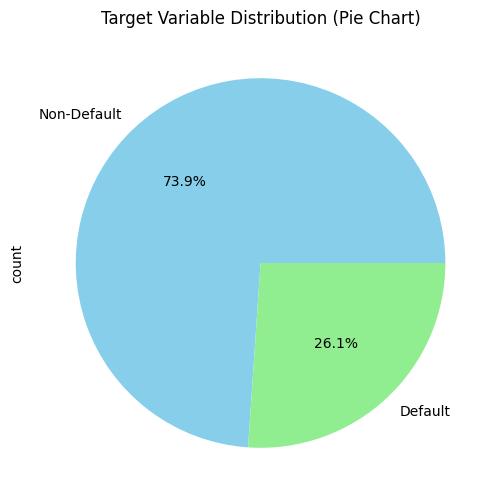

In [63]:
# Plot pie chart for class distribution
plt.figure(figsize=(6, 6))
data_train['TARGET_LABEL_BAD.1'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Default', 'Default'], colors=['skyblue', 'lightgreen'])
plt.title('Target Variable Distribution (Pie Chart)')
plt.show()

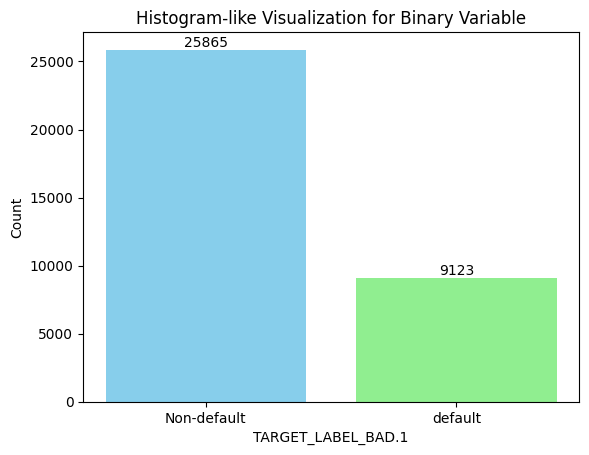

In [64]:
# Count the occurrences of each category (0 or 1)
counts = data_train['TARGET_LABEL_BAD.1'].value_counts()

# Create a bar plot to mimic a histogram
plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('TARGET_LABEL_BAD.1')
plt.ylabel('Count')
plt.title('Histogram-like Visualization for Binary Variable')
plt.xticks(counts.index, labels=['Non-default', 'default'])

for i in range(len(counts)):
    plt.text(counts.index[i], counts.values[i], str(counts.values[i]), ha='center', va='bottom')


# Show the plot
plt.show()

## INDEPENDENT VARIABLE

### Categorical

<Axes: ylabel='count'>

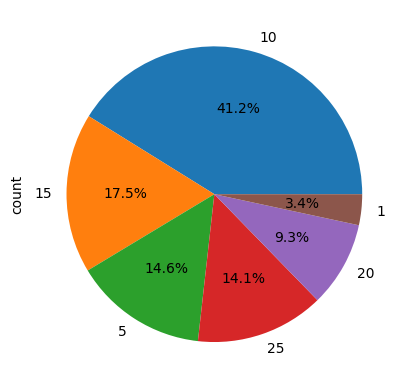

In [65]:
data_train['PAYMENT_DAY'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

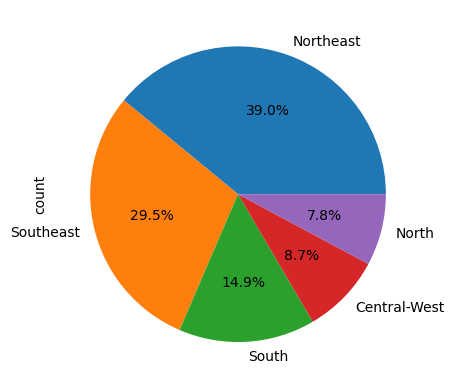

In [66]:
data_train['RESIDENCIAL_REGION'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

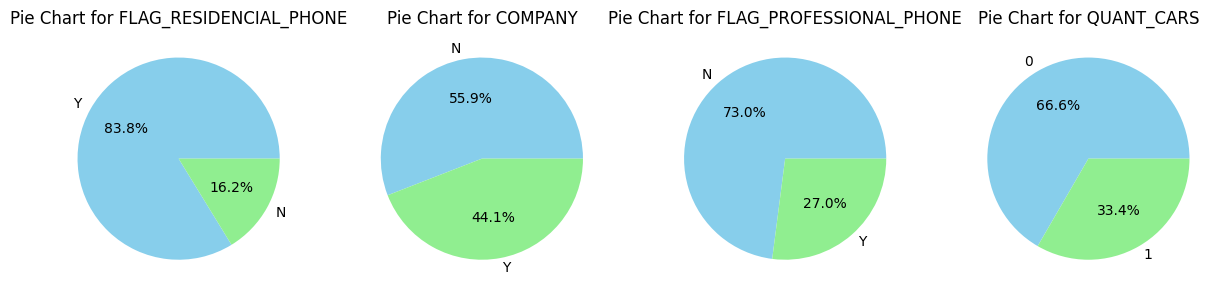

In [67]:
predictors = ['FLAG_RESIDENCIAL_PHONE', 'COMPANY', 'FLAG_PROFESSIONAL_PHONE','QUANT_CARS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

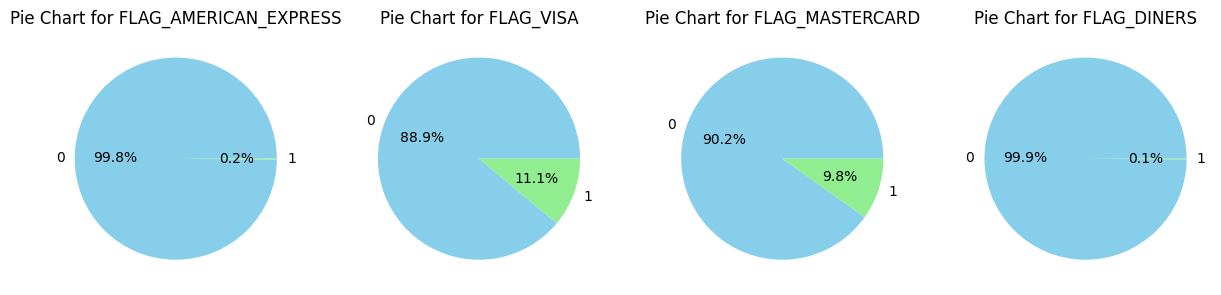

In [68]:
predictors = ['FLAG_AMERICAN_EXPRESS', 'FLAG_VISA', 'FLAG_MASTERCARD','FLAG_DINERS']

# Create subplots for each pie chart
fig, axs = plt.subplots(1, len(predictors), figsize=(15, 5))

# Plot a pie chart for each predictor
for i, predictor in enumerate(predictors):
    counts = data_train[predictor].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    axs[i].set_title(f'Pie Chart for {predictor}')

plt.show()

<Axes: ylabel='count'>

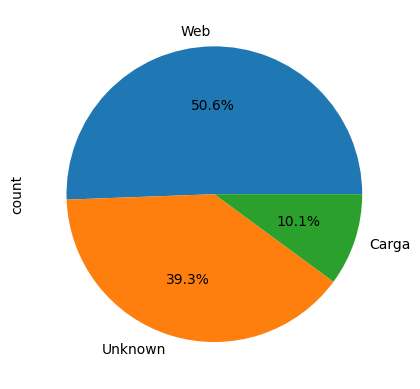

In [69]:
data_train['APPLICATION_SUBMISSION_TYPE'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

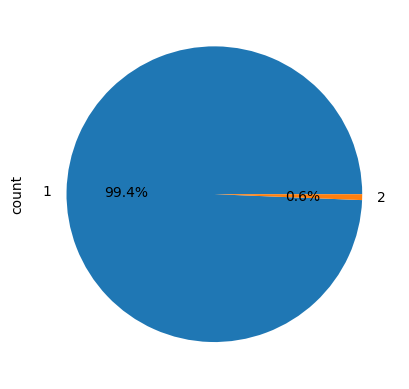

In [70]:
data_train['POSTAL_ADDRESS_TYPE'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

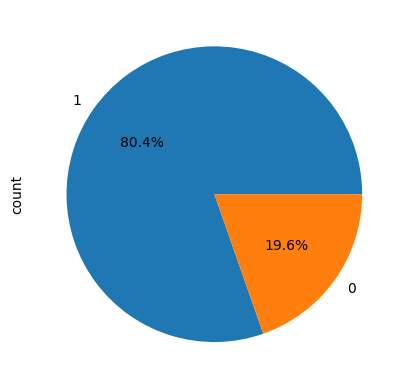

In [71]:
data_train['FLAG_EMAIL'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

<Axes: ylabel='count'>

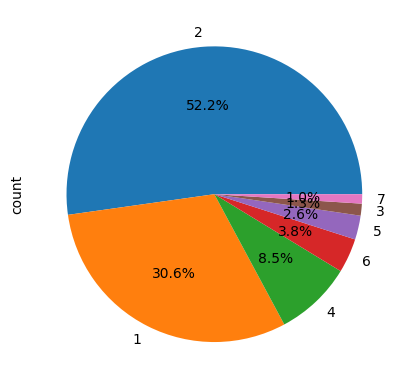

In [72]:
data_train['MARITAL_STATUS'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

### NUMERICAL

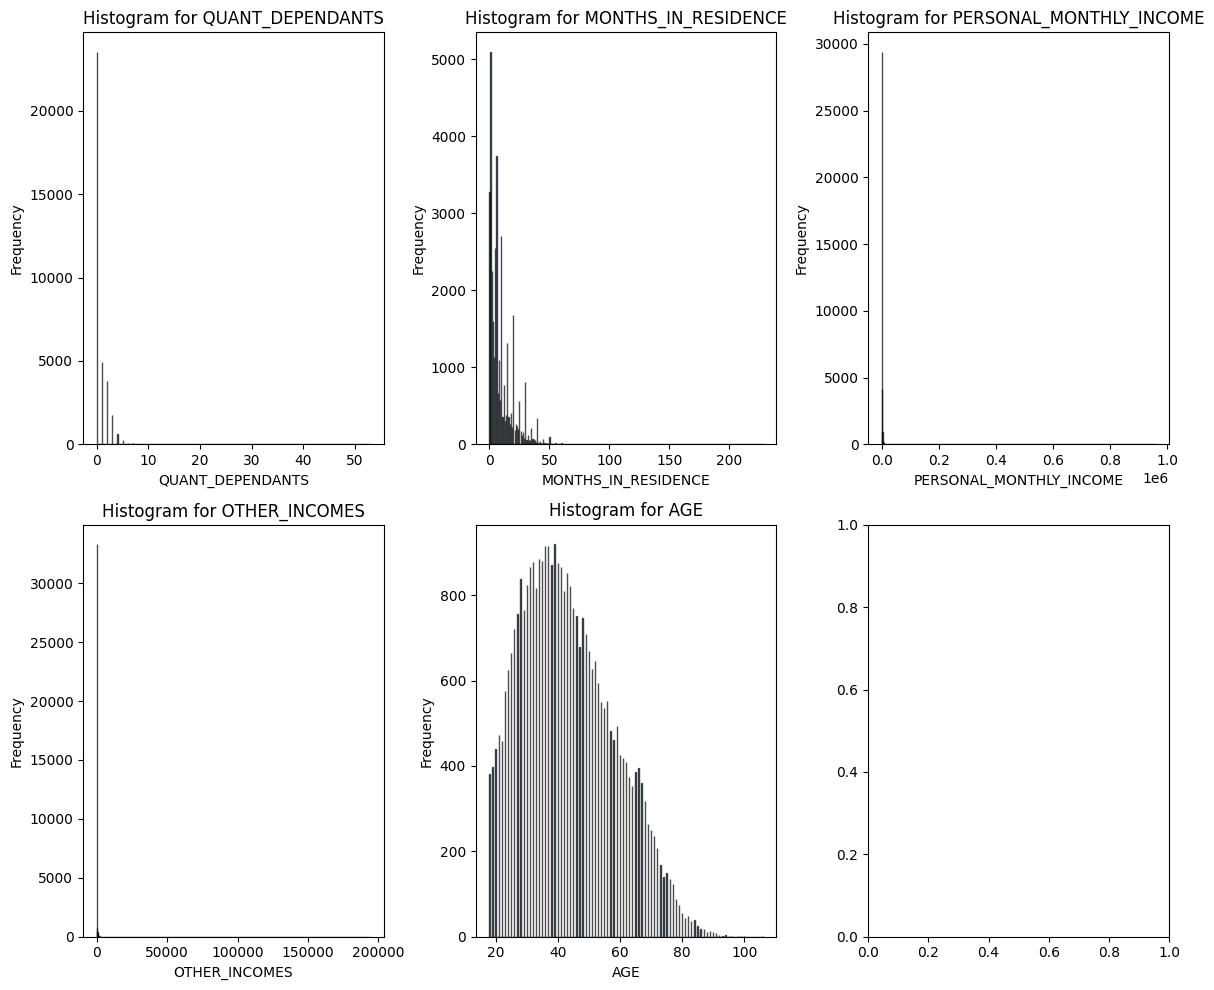

In [73]:
# List of numerical columns
numerical_columns = ['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']

# Create subplots for each histogram
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot a histogram for each numerical column
for i, column in enumerate(numerical_columns):
    axs[i].hist(data_train[column], bins=1000, edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Histogram for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [74]:
data_train[numerical_columns].describe()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE
count,34988.000000,34988.000000,34988.000000,34988.000000,34988.000000
mean,0.649708,9.431948,916.685171,37.131006,43.228307
std,1.200018,10.291078,9148.782879,1056.144886,14.969630
min,0.000000,0.000000,60.000000,0.000000,18.000000
25%,0.000000,2.000000,360.000000,0.000000,31.000000
50%,0.000000,6.000000,500.000000,0.000000,41.000000
75%,1.000000,14.000000,800.000000,0.000000,53.000000
max,53.000000,228.000000,959000.000000,194344.000000,106.000000


## RELATIONSHIP

In [75]:
# fig8, ax8 = plt.subplots()
# sns.countplot(data = data_train, x = data_train['RESIDENCIAL_REGION'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
# plt.title('RESIDENCIAL_REGION VS TARGET_LABEL_BAD.1')
# for label in ax8.containers:
#     ax8.bar_label(label)

In [76]:
# fig8, ax8 = plt.subplots()
# sns.countplot(data = data_train, x = data_train['PAYMENT_DAY'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
# plt.title('PAYMENT_DAY VS TARGET_LABEL_BAD.1')
# for label in ax8.containers:
#     ax8.bar_label(label)

In [77]:
# fig8, ax8 = plt.subplots()
# sns.countplot(data = data_train, x = data_train['COMPANY'], hue = 'TARGET_LABEL_BAD.1',ax = ax8)
# plt.title('COMPANY VS TARGET_LABEL_BAD.1')
# for label in ax8.containers:
#     ax8.bar_label(label)

### HEATPLOT - For Logistic Regression

In [78]:
# plt.subplots(figsize=(25,20))
# sns.heatmap(data_train.corr(),square=True, annot=True,cmap="YlGnBu")
# plt.show()

### High Correlation among QUANT_CARS / BANKING ACCOUNT AND FLAG EMAIL - May drop two when we consider logistic regression

In [79]:
data_train['QUANT_CARS'].value_counts()

QUANT_CARS
0    23313
1    11675
Name: count, dtype: int64

In [80]:
data_train["QUANT_BANKING_ACCOUNTS"].value_counts()

QUANT_BANKING_ACCOUNTS
0    22563
1    12415
2       10
Name: count, dtype: int64

In [81]:
data_train['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
1    28118
0     6870
Name: count, dtype: int64

In [82]:
import copy

data_train_logit = copy.deepcopy(data_train)
data_test_logit = copy.deepcopy(data_test)

In [83]:
data_train_logit.drop("QUANT_BANKING_ACCOUNTS", axis=1, inplace=True)

In [84]:
data_test_logit.drop('QUANT_BANKING_ACCOUNTS', axis=1, inplace=True)

In [85]:
data_train_logit.drop('FLAG_EMAIL', axis=1, inplace=True)

In [86]:
data_test_logit.drop('FLAG_EMAIL', axis=1, inplace=True)

### Numerical data

In [87]:
num_data = data_train[['QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES','AGE']]

In [88]:
num_data.head()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE
35652,0,6.0,735.0,0.0,68
10443,0,22.0,972.0,0.0,61
39543,0,0.0,482.0,0.0,64
17395,0,31.0,912.0,0.0,68
7491,0,30.0,454.0,0.0,39


In [89]:
# sns.pairplot(num_data)
# plt.show()

# OUTLIER
        we used box-wiskers plots and scatter plots to visualise all the numeric varibles' distributions
## defining IQR and Z-score outliers handling functions 

In [90]:
numerical_predictor_columns = [
    "QUANT_DEPENDANTS",
    "MONTHS_IN_RESIDENCE",
    "PERSONAL_MONTHLY_INCOME",
    "OTHER_INCOMES",
    "AGE",
]

from scipy import stats


def visualize_outliers_handling_Zscore(data, var, z_threshold=3):
    # Calculate Z-score
    data["z_score"] = stats.zscore(data[var])

    # Detect outliers
    outliers = data[(data["z_score"] > z_threshold) | (data["z_score"] < -z_threshold)]

    # Plotting: boxplot, scatterplot, and histogram
    plt.figure(figsize=(20, 18))

    # First subplot: boxplot
    plt.subplot(3, 1, 1)
    sns.boxplot(x=data[var], color="lightgrey", width=0.5)
    plt.title(f"Z-score Boxplot of {var}")
    plt.xlabel(var)

    # Second subplot: scatterplot, including outliers
    plt.subplot(3, 1, 2)
    plt.scatter(data.index, data[var], color="lightblue", label="Data", alpha=0.6)
    plt.scatter(outliers.index, outliers[var], color="red", label="Outliers")
    plt.title(f"Z-score Scatterplot with Outliers in {var}")
    plt.xlabel("Index")
    plt.ylabel(var)
    plt.legend()

    # Third subplot: histogram, including outliers
    plt.subplot(3, 1, 3)
    plt.hist(data[var], bins=30, color="lightblue", edgecolor="black", alpha=0.7)
    plt.hist(outliers[var], bins=30, color="red", edgecolor="black", alpha=0.7)
    plt.title(f"Histogram with Outliers in {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

    plt.show()

    # Printing outlier information
    if not outliers.empty:
        print(f"Outliers in {var} Z-score:")
        print(outliers[var].value_counts())
        outliers_count = outliers.shape[0]
        print(f"Number of outliers in {var} Z-score: {outliers_count}\n")
    else:
        print(f"No outliers in {var} Z-score\n")

    # Drop z_score column to avoid affecting the next variable
    data.drop("z_score", axis=1, inplace=True)

    return outliers


def visualize_outliers_handling_IQR(data, var):
    # calculate IQR
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1

    # define boudaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)].sort_values(
        by=var
    )

    # Plotting: boxplot, scatterplot, and histogram
    plt.figure(figsize=(20, 18))

    # First subplot: boxplot
    plt.subplot(3, 1, 1)
    sns.boxplot(x=data[var], color="lightgrey", width=0.5)
    plt.title(f"IQR Boxplot of {var}")
    plt.xlabel(var)

    # Second subplot: scatterplot, including outliers
    plt.subplot(3, 1, 2)
    plt.scatter(data.index, data[var], color="lightblue", label="Data", alpha=0.6)
    plt.scatter(outliers.index, outliers[var], color="red", label="Outliers")
    plt.title(f"IQR Scatterplot with Outliers in {var}")
    plt.xlabel("Index")
    plt.ylabel(var)
    plt.legend()

    # Third subplot: histogram, including outliers
    plt.subplot(3, 1, 3)
    plt.hist(data[var], bins=60, color="lightblue", edgecolor="black", alpha=0.7)
    plt.hist(outliers[var], bins=60, color="red", edgecolor="black", alpha=0.7)
    plt.title(f"Histogram with Outliers in {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

    plt.show()

    if not outliers.empty:
        print(f"Outliers in {var} IQR:")
        print(outliers[var].value_counts())
        outliers_count = outliers.shape[0]
        print(f"Number of outliers in {var} IQR: {outliers_count}\n")
    else:
        print(f"No outliers in {var} IQR\n")

    return outliers

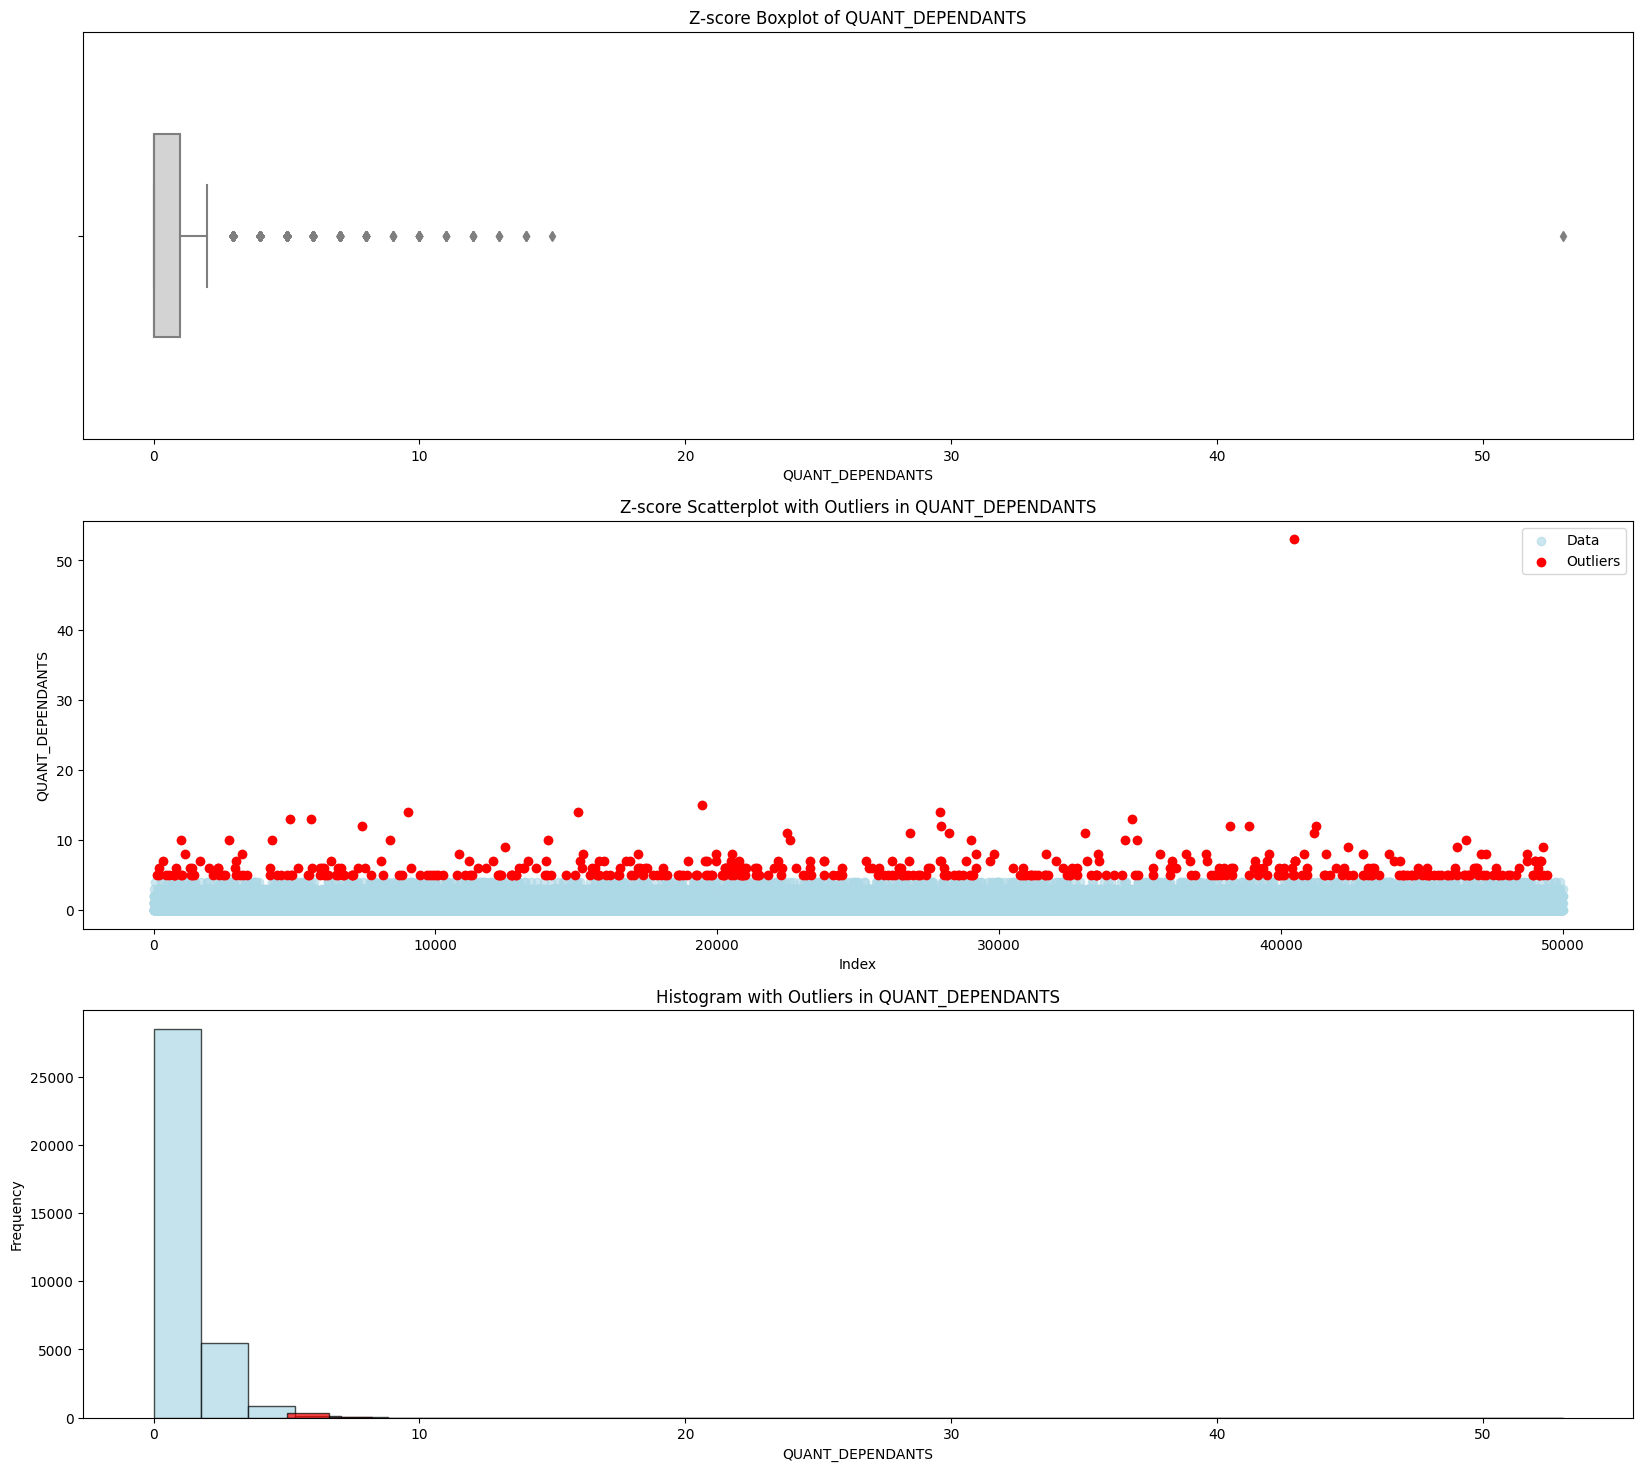

Outliers in QUANT_DEPENDANTS Z-score:
QUANT_DEPENDANTS
5     242
6      93
7      49
8      22
10     10
12      5
11      5
9       4
14      3
13      3
53      1
15      1
Name: count, dtype: int64
Number of outliers in QUANT_DEPENDANTS Z-score: 438



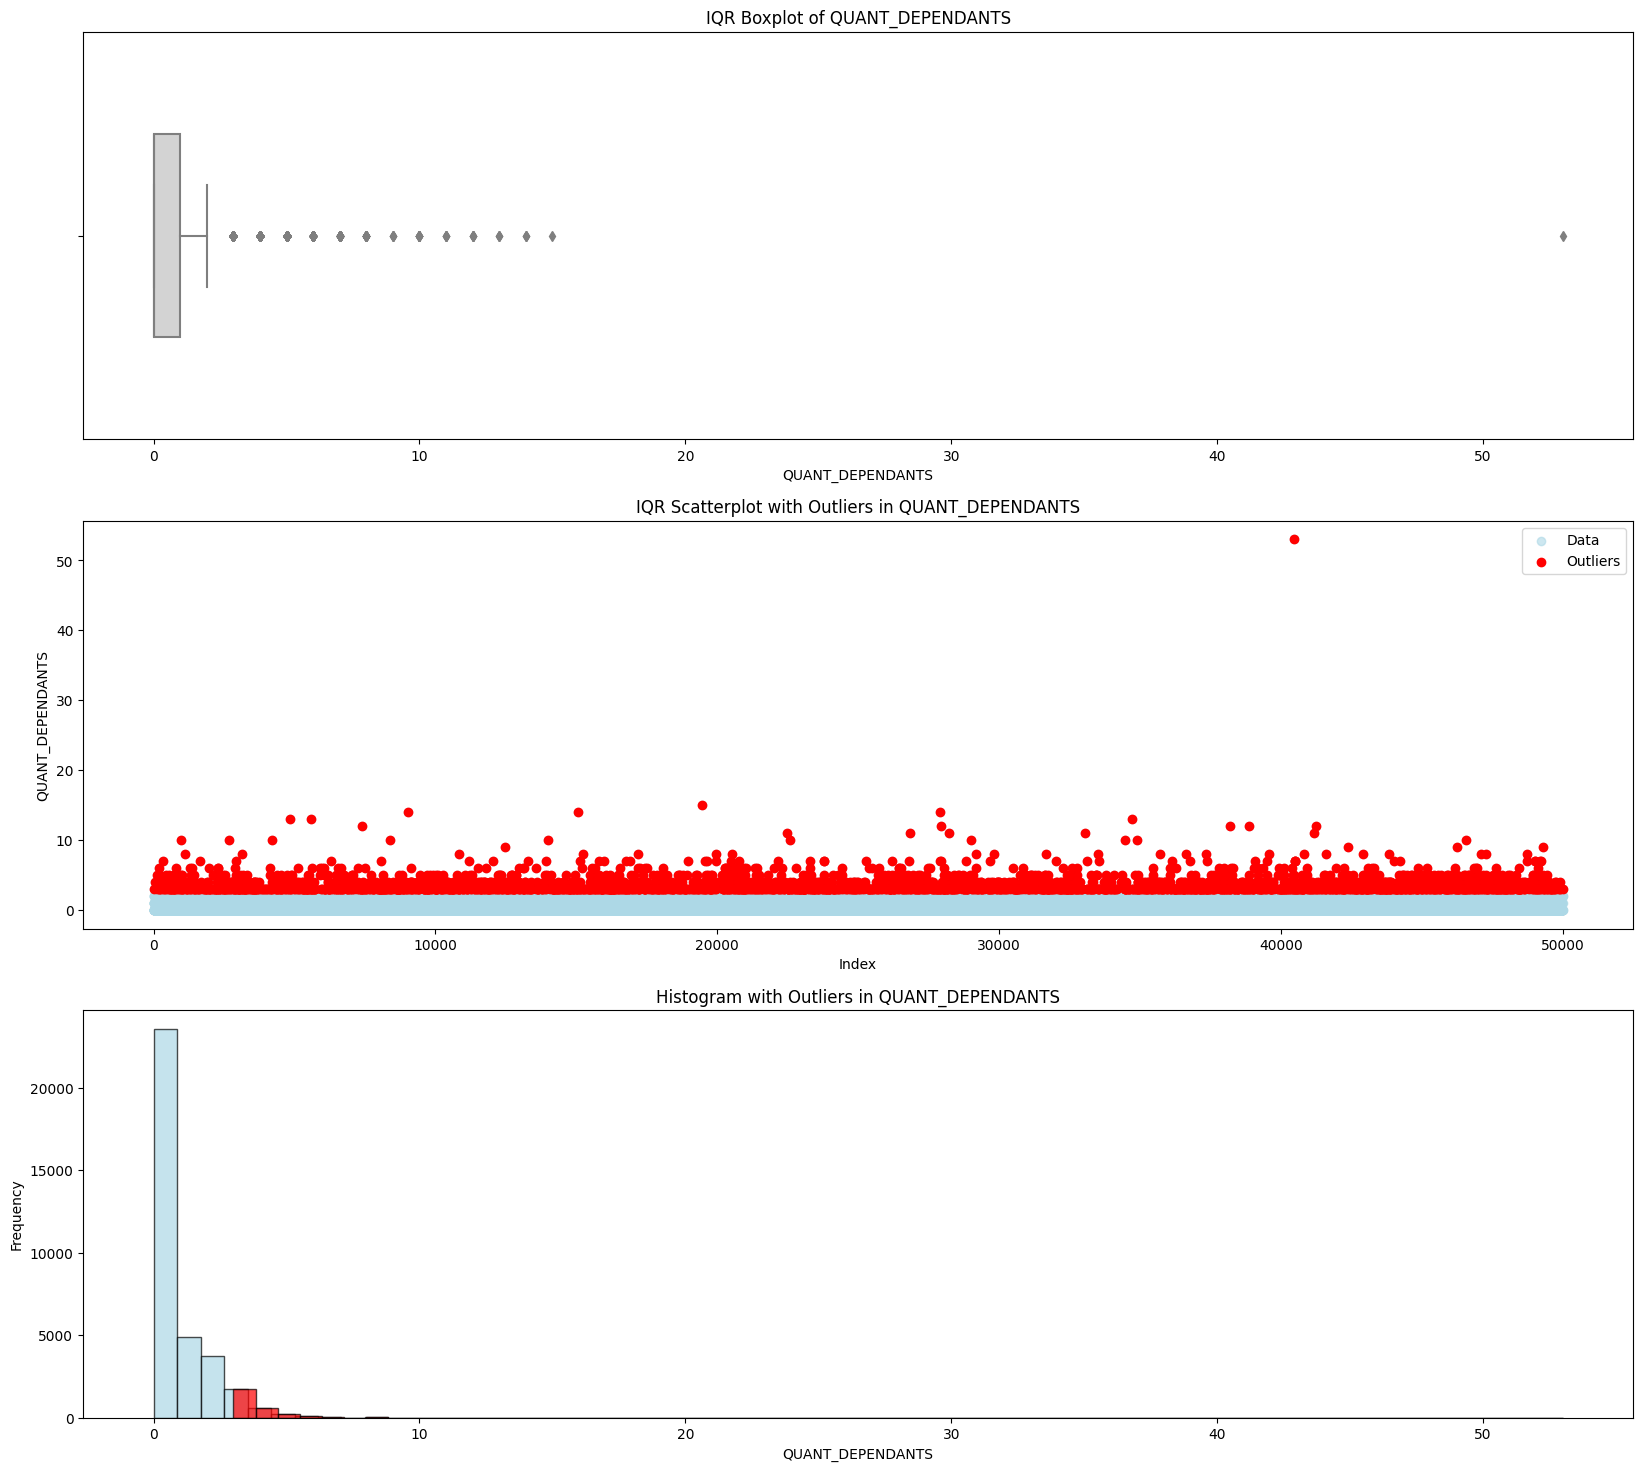

Outliers in QUANT_DEPENDANTS IQR:
QUANT_DEPENDANTS
3     1737
4      597
5      242
6       93
7       49
8       22
10      10
11       5
12       5
9        4
13       3
14       3
15       1
53       1
Name: count, dtype: int64
Number of outliers in QUANT_DEPENDANTS IQR: 2772



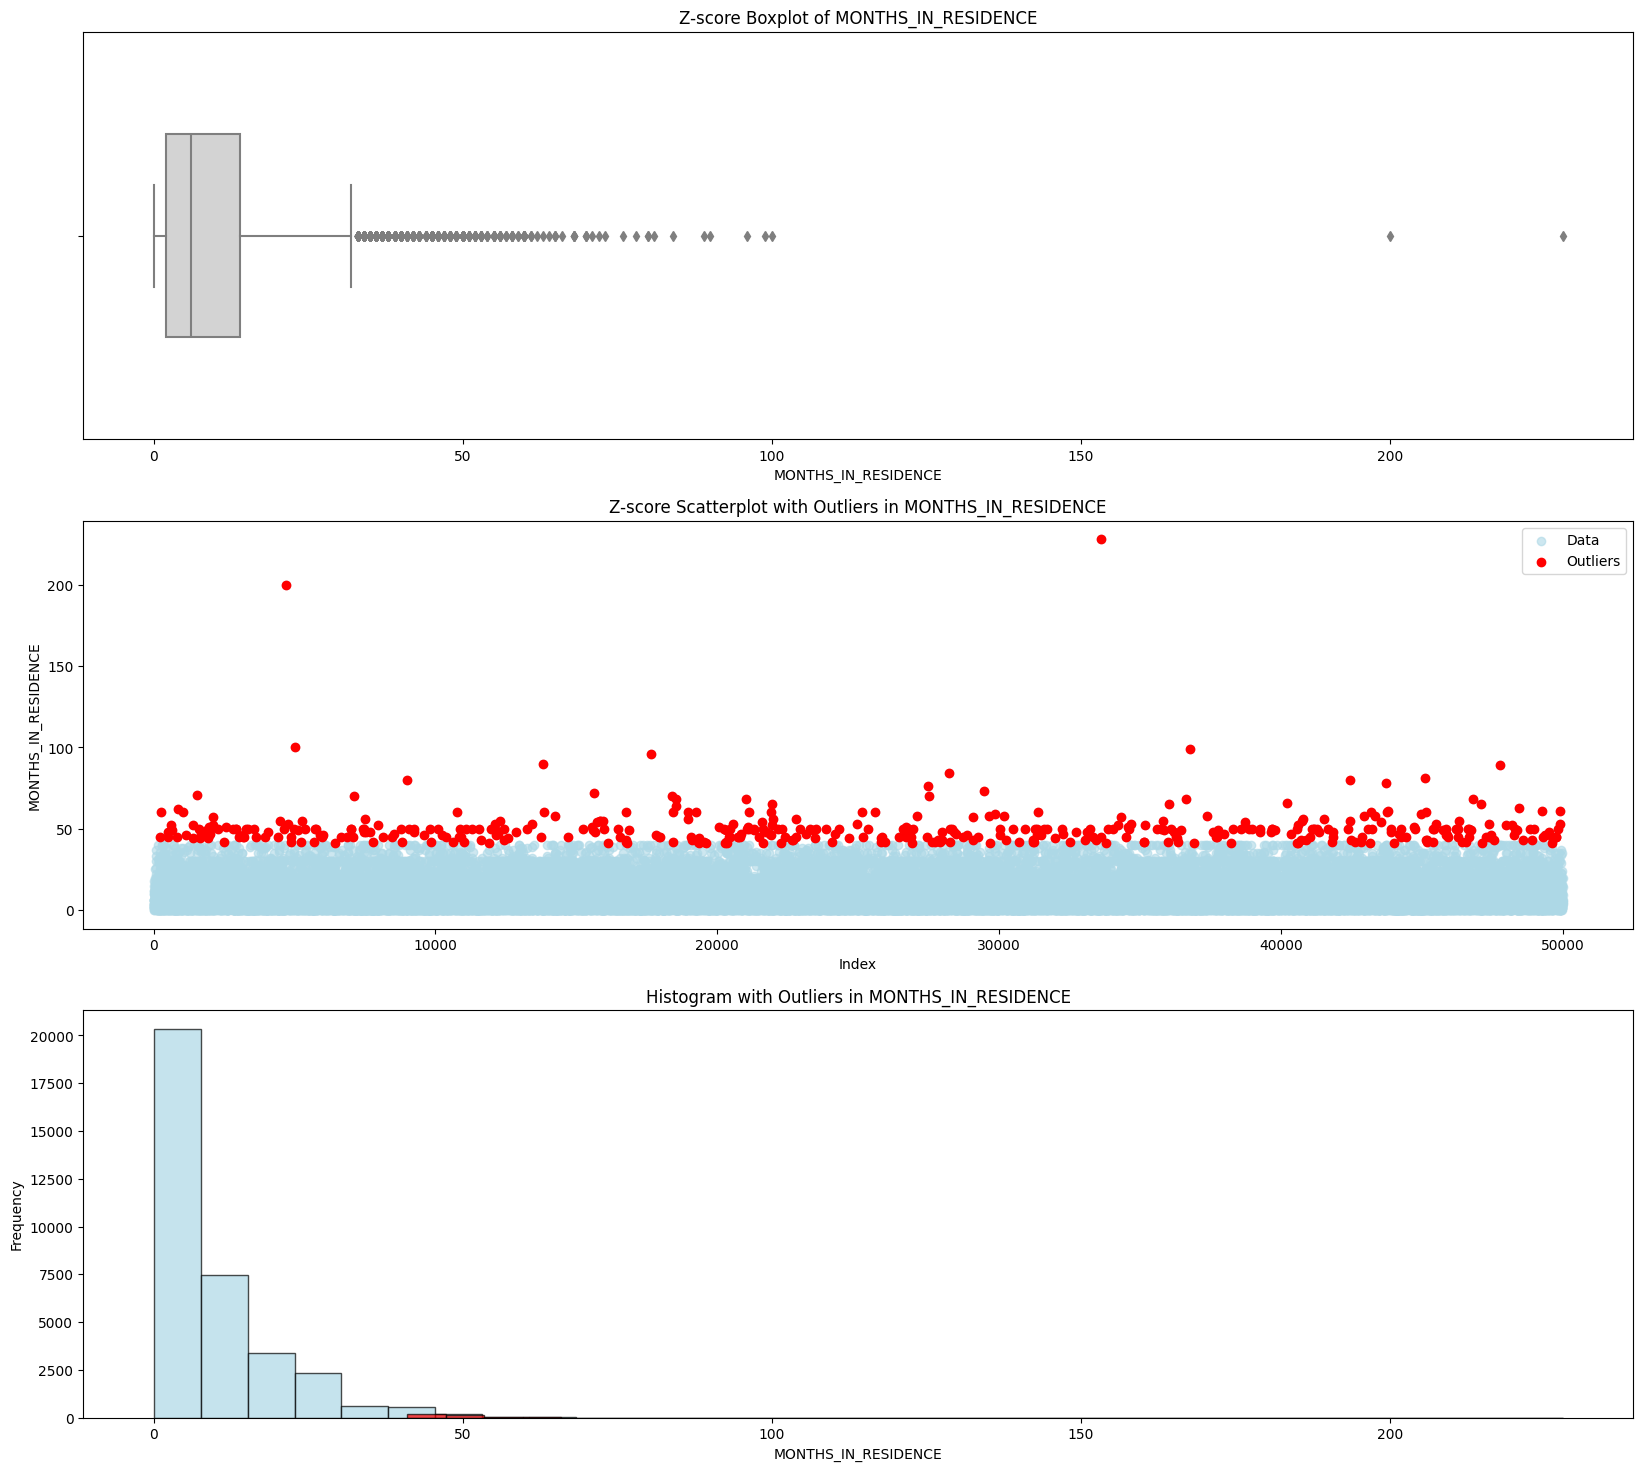

Outliers in MONTHS_IN_RESIDENCE Z-score:
MONTHS_IN_RESIDENCE
50.0     99
45.0     62
42.0     36
48.0     22
41.0     21
43.0     21
46.0     19
60.0     16
49.0     15
47.0     14
55.0     10
52.0     10
44.0     10
53.0      9
51.0      9
58.0      7
56.0      6
68.0      4
54.0      4
57.0      3
70.0      3
61.0      3
65.0      3
59.0      2
80.0      2
62.0      1
89.0      1
64.0      1
72.0      1
71.0      1
100.0     1
228.0     1
76.0      1
84.0      1
96.0      1
90.0      1
78.0      1
73.0      1
99.0      1
66.0      1
63.0      1
200.0     1
81.0      1
Name: count, dtype: int64
Number of outliers in MONTHS_IN_RESIDENCE Z-score: 428



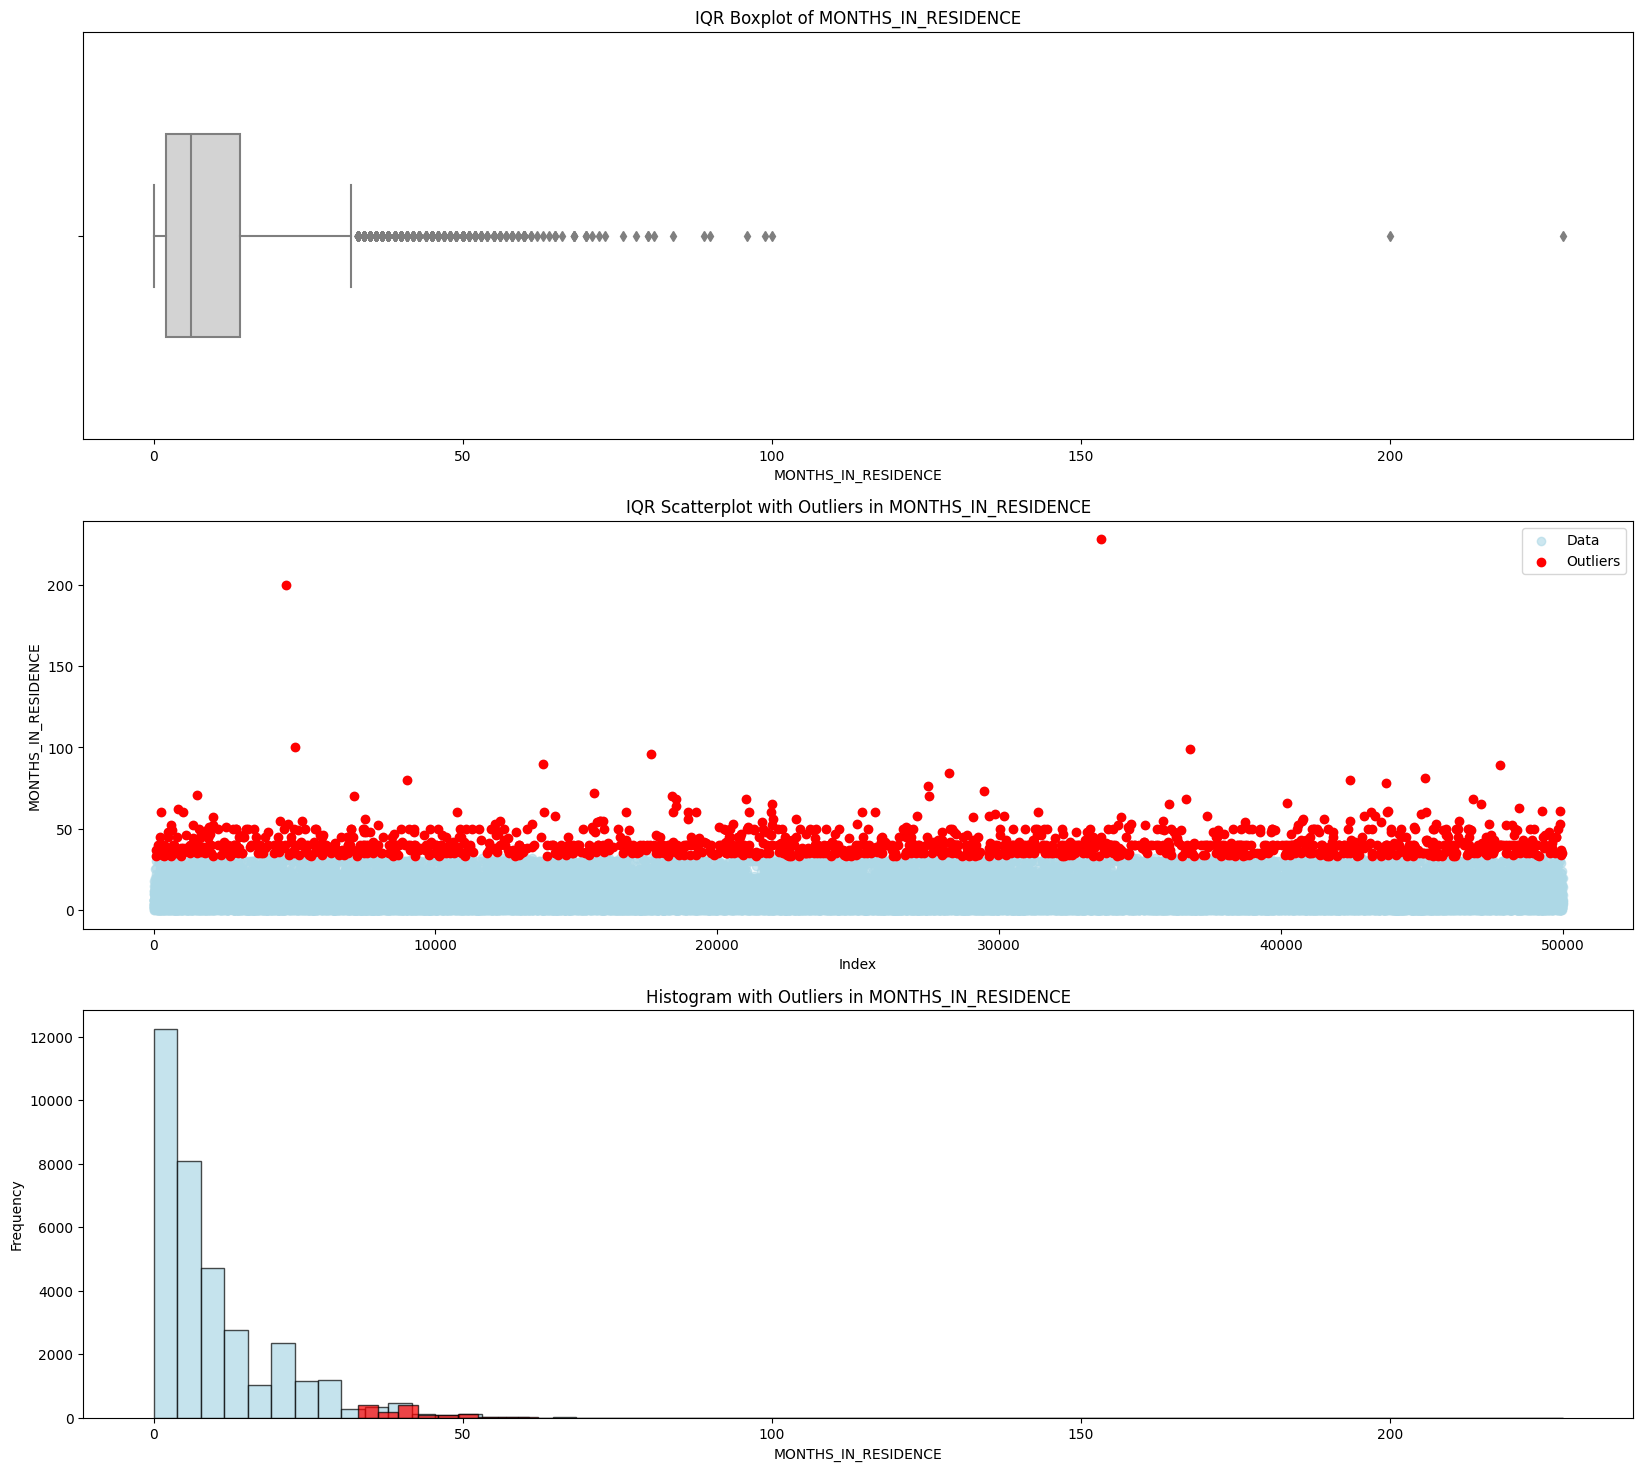

Outliers in MONTHS_IN_RESIDENCE IQR:
MONTHS_IN_RESIDENCE
40.0     341
35.0     205
50.0      99
37.0      70
36.0      68
45.0      62
38.0      61
34.0      60
33.0      52
42.0      36
39.0      34
48.0      22
43.0      21
41.0      21
46.0      19
60.0      16
49.0      15
47.0      14
52.0      10
44.0      10
55.0      10
53.0       9
51.0       9
58.0       7
56.0       6
68.0       4
54.0       4
57.0       3
70.0       3
65.0       3
61.0       3
80.0       2
59.0       2
100.0      1
99.0       1
96.0       1
200.0      1
90.0       1
89.0       1
84.0       1
81.0       1
72.0       1
78.0       1
76.0       1
73.0       1
71.0       1
66.0       1
64.0       1
63.0       1
62.0       1
228.0      1
Name: count, dtype: int64
Number of outliers in MONTHS_IN_RESIDENCE IQR: 1319



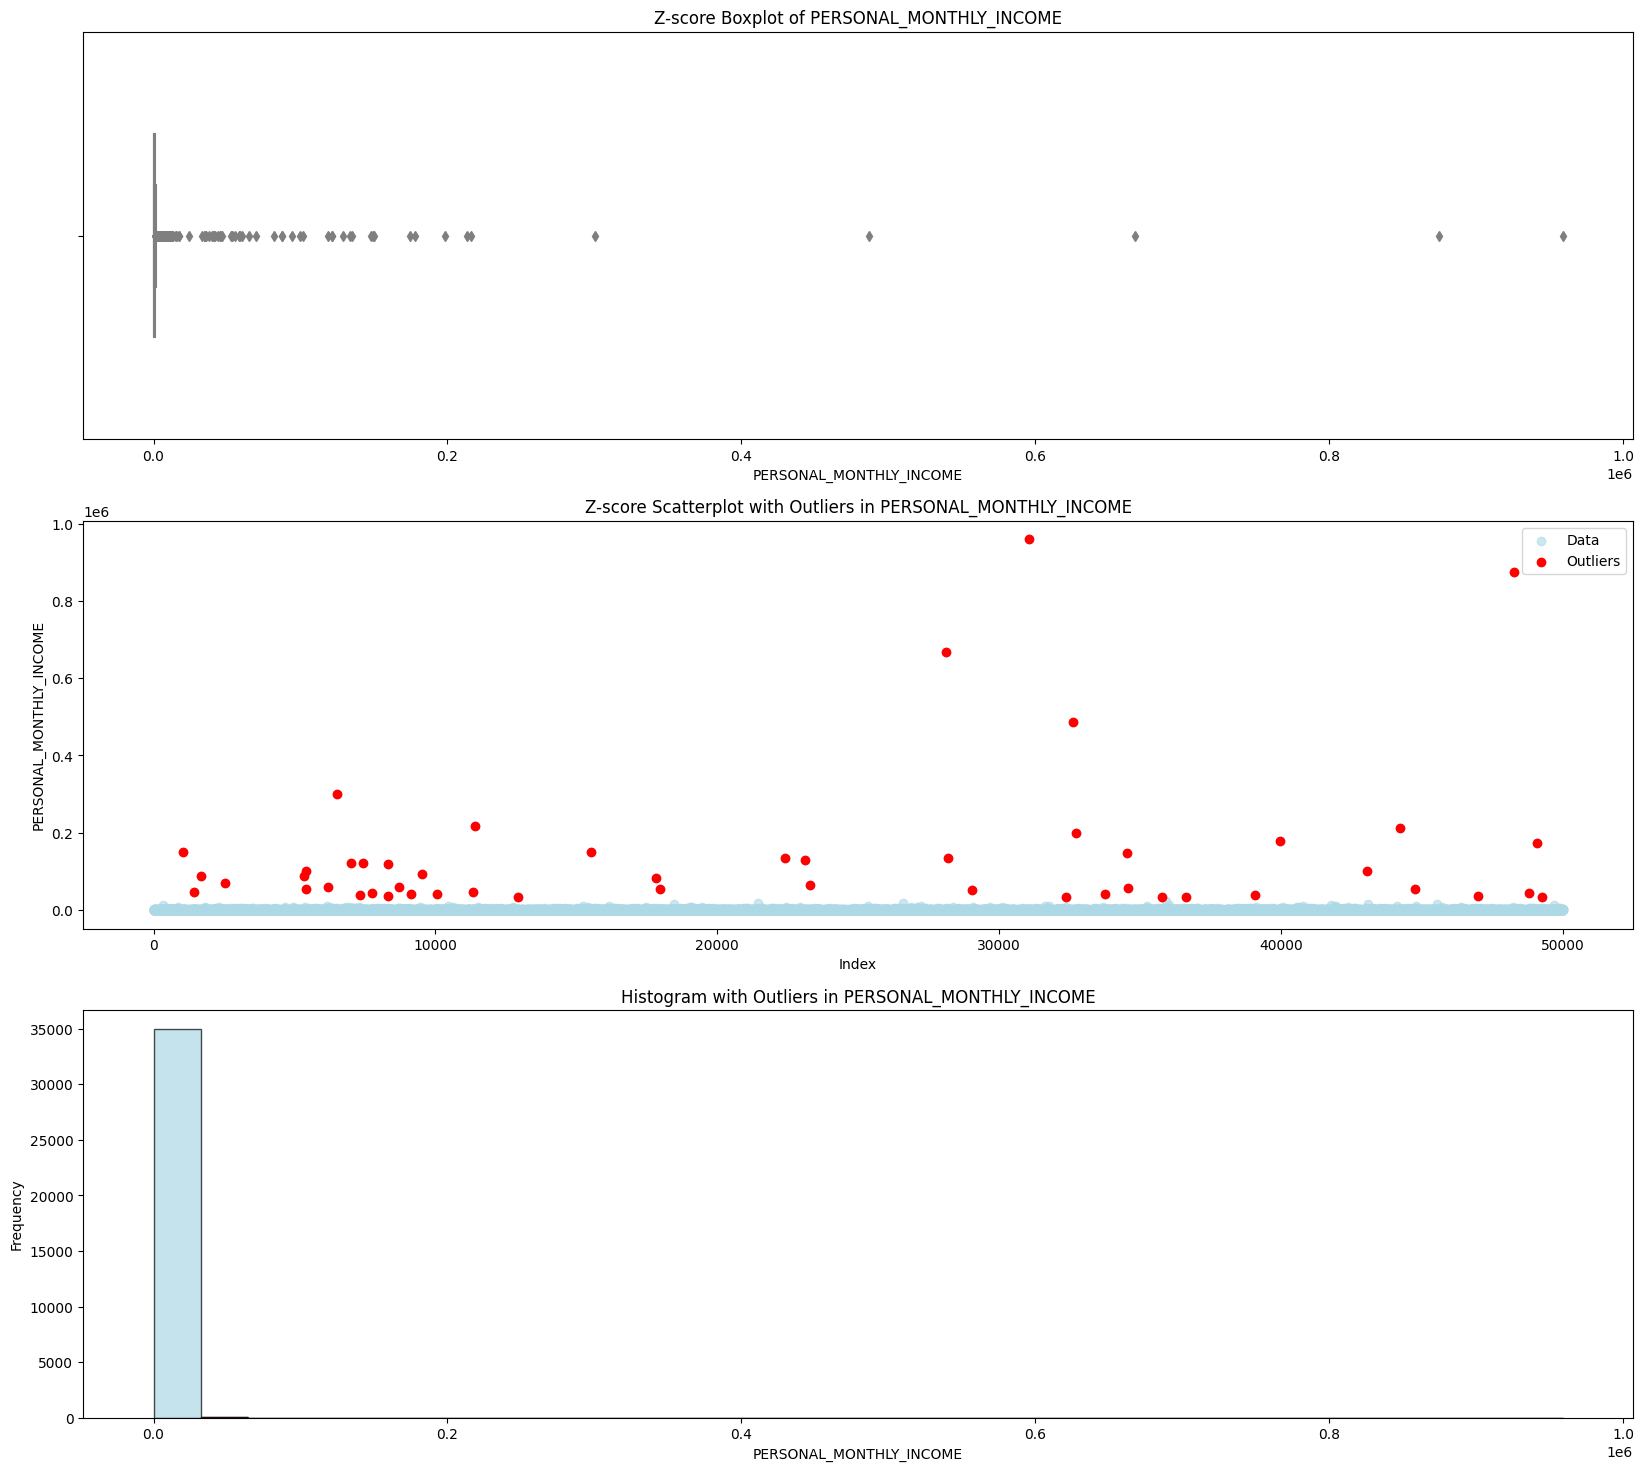

Outliers in PERSONAL_MONTHLY_INCOME Z-score:
PERSONAL_MONTHLY_INCOME
35000.0     4
38000.0     1
53535.0     1
59160.0     1
46348.0     1
875000.0    1
486778.0    1
35133.0     1
213063.0    1
41557.0     1
87635.0     1
70000.0     1
118666.0    1
668000.0    1
46245.0     1
94155.0     1
36000.0     1
174274.0    1
121669.0    1
149144.0    1
959000.0    1
177991.0    1
147842.0    1
53508.0     1
40925.0     1
60012.0     1
100000.0    1
45083.0     1
87300.0     1
134841.0    1
300409.0    1
198183.0    1
129168.0    1
150040.0    1
52475.0     1
101855.0    1
121762.0    1
134000.0    1
33089.0     1
81789.0     1
58294.0     1
216395.0    1
40500.0     1
65120.0     1
40000.0     1
43721.0     1
55419.0     1
Name: count, dtype: int64
Number of outliers in PERSONAL_MONTHLY_INCOME Z-score: 50



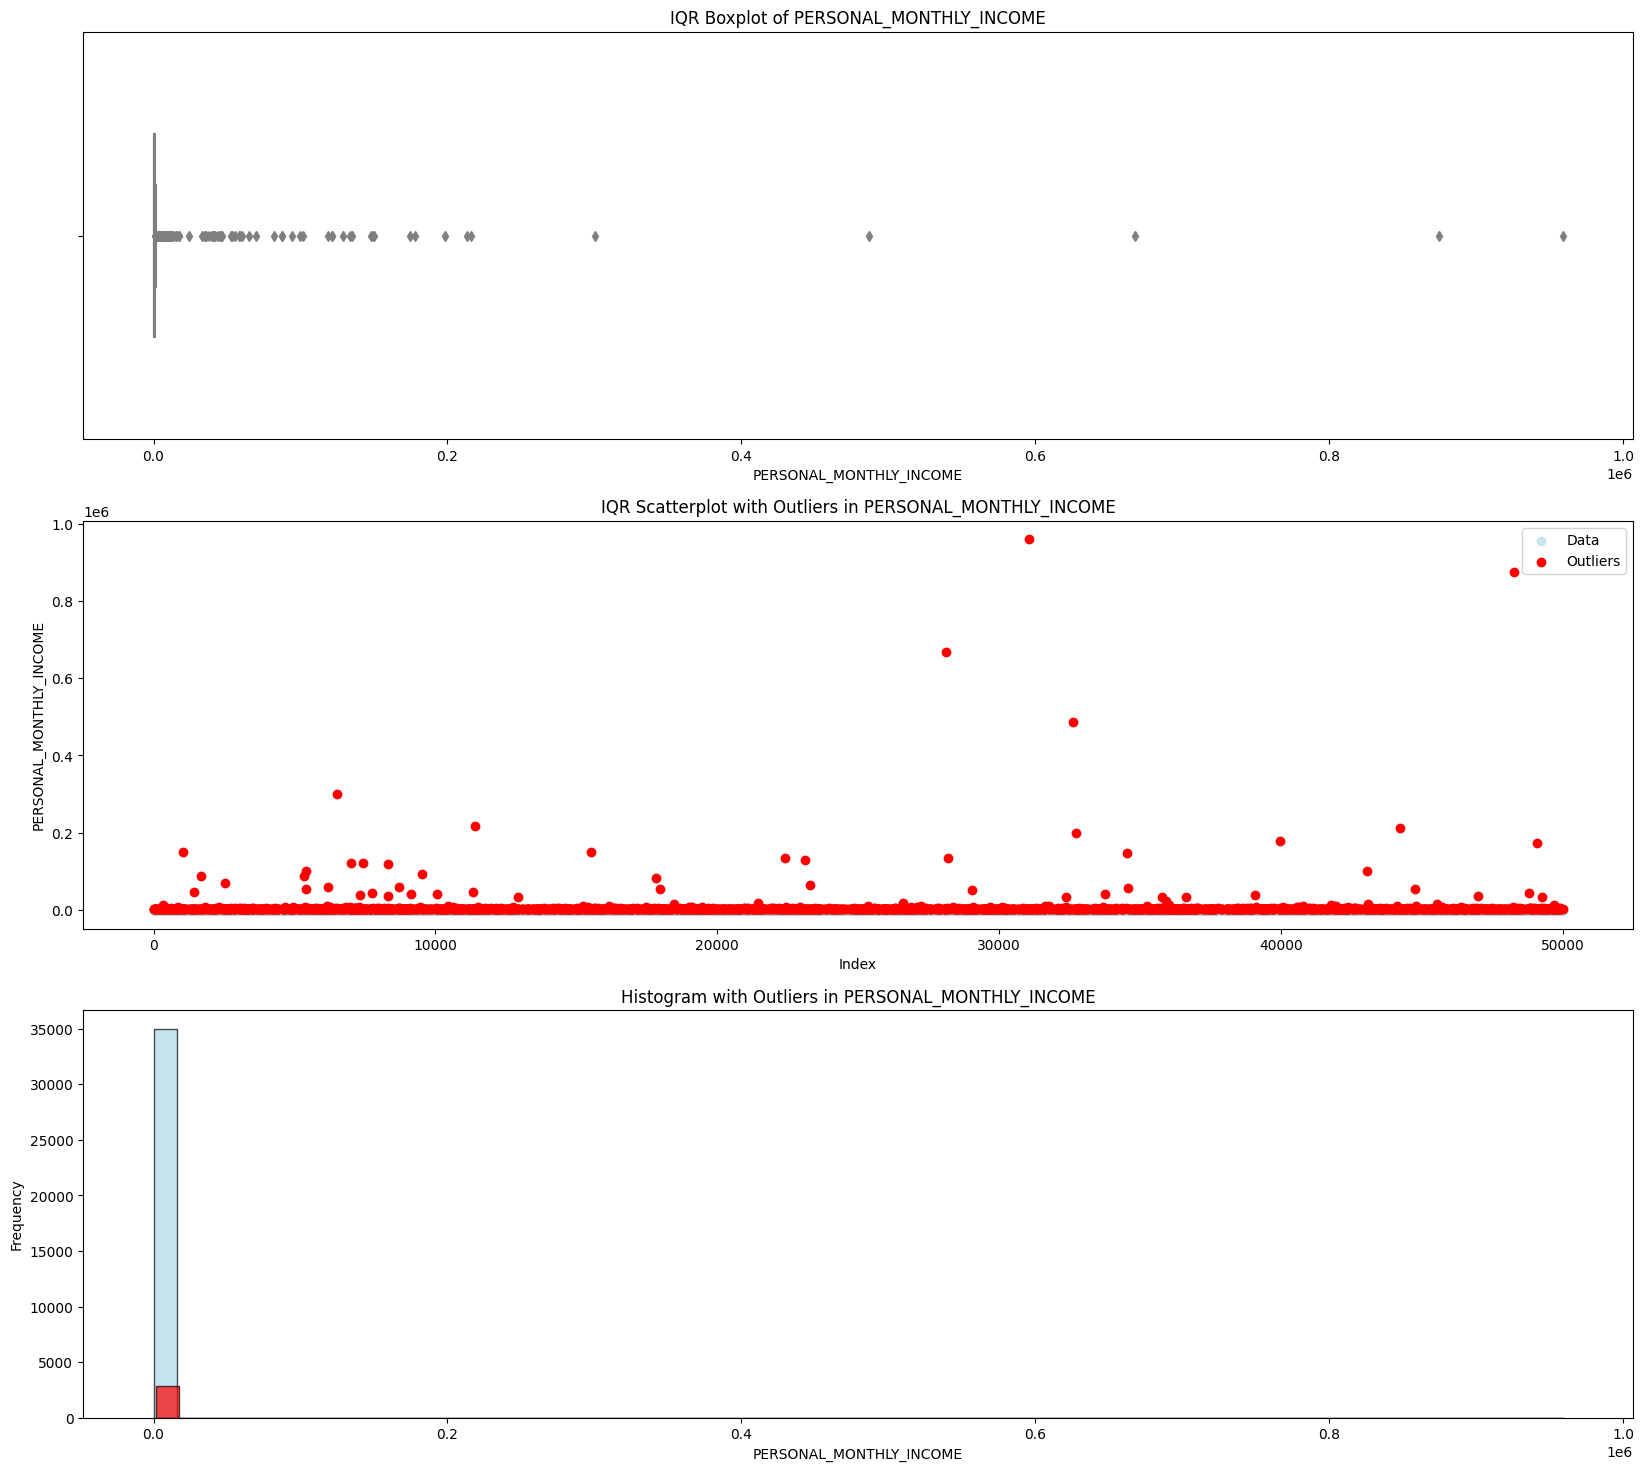

Outliers in PERSONAL_MONTHLY_INCOME IQR:
PERSONAL_MONTHLY_INCOME
1500.00      261
2000.00      147
1800.00       87
2500.00       60
1600.00       57
3000.00       44
1900.00       25
2800.00       23
2200.00       23
1700.00       22
2400.00       20
2100.00       19
3500.00       18
2600.00       17
4000.00       16
1560.00       14
2300.00       13
5000.00       12
1750.00        9
1950.00        9
2900.00        8
3600.00        8
5400.00        8
1820.00        7
1470.00        7
1670.00        7
1852.00        6
1610.00        6
8000.00        6
1580.00        6
6000.00        6
1540.00        6
1780.00        6
1620.00        6
1680.00        6
2700.00        6
1501.00        5
1550.00        5
2583.00        5
1980.00        5
1575.00        5
1650.00        5
7000.00        5
2280.00        5
1696.00        4
1536.00        4
2182.00        4
2375.00        4
1462.00        4
2176.00        4
1907.00        4
2668.00        4
1613.00        4
1683.00        4
1616.00        4


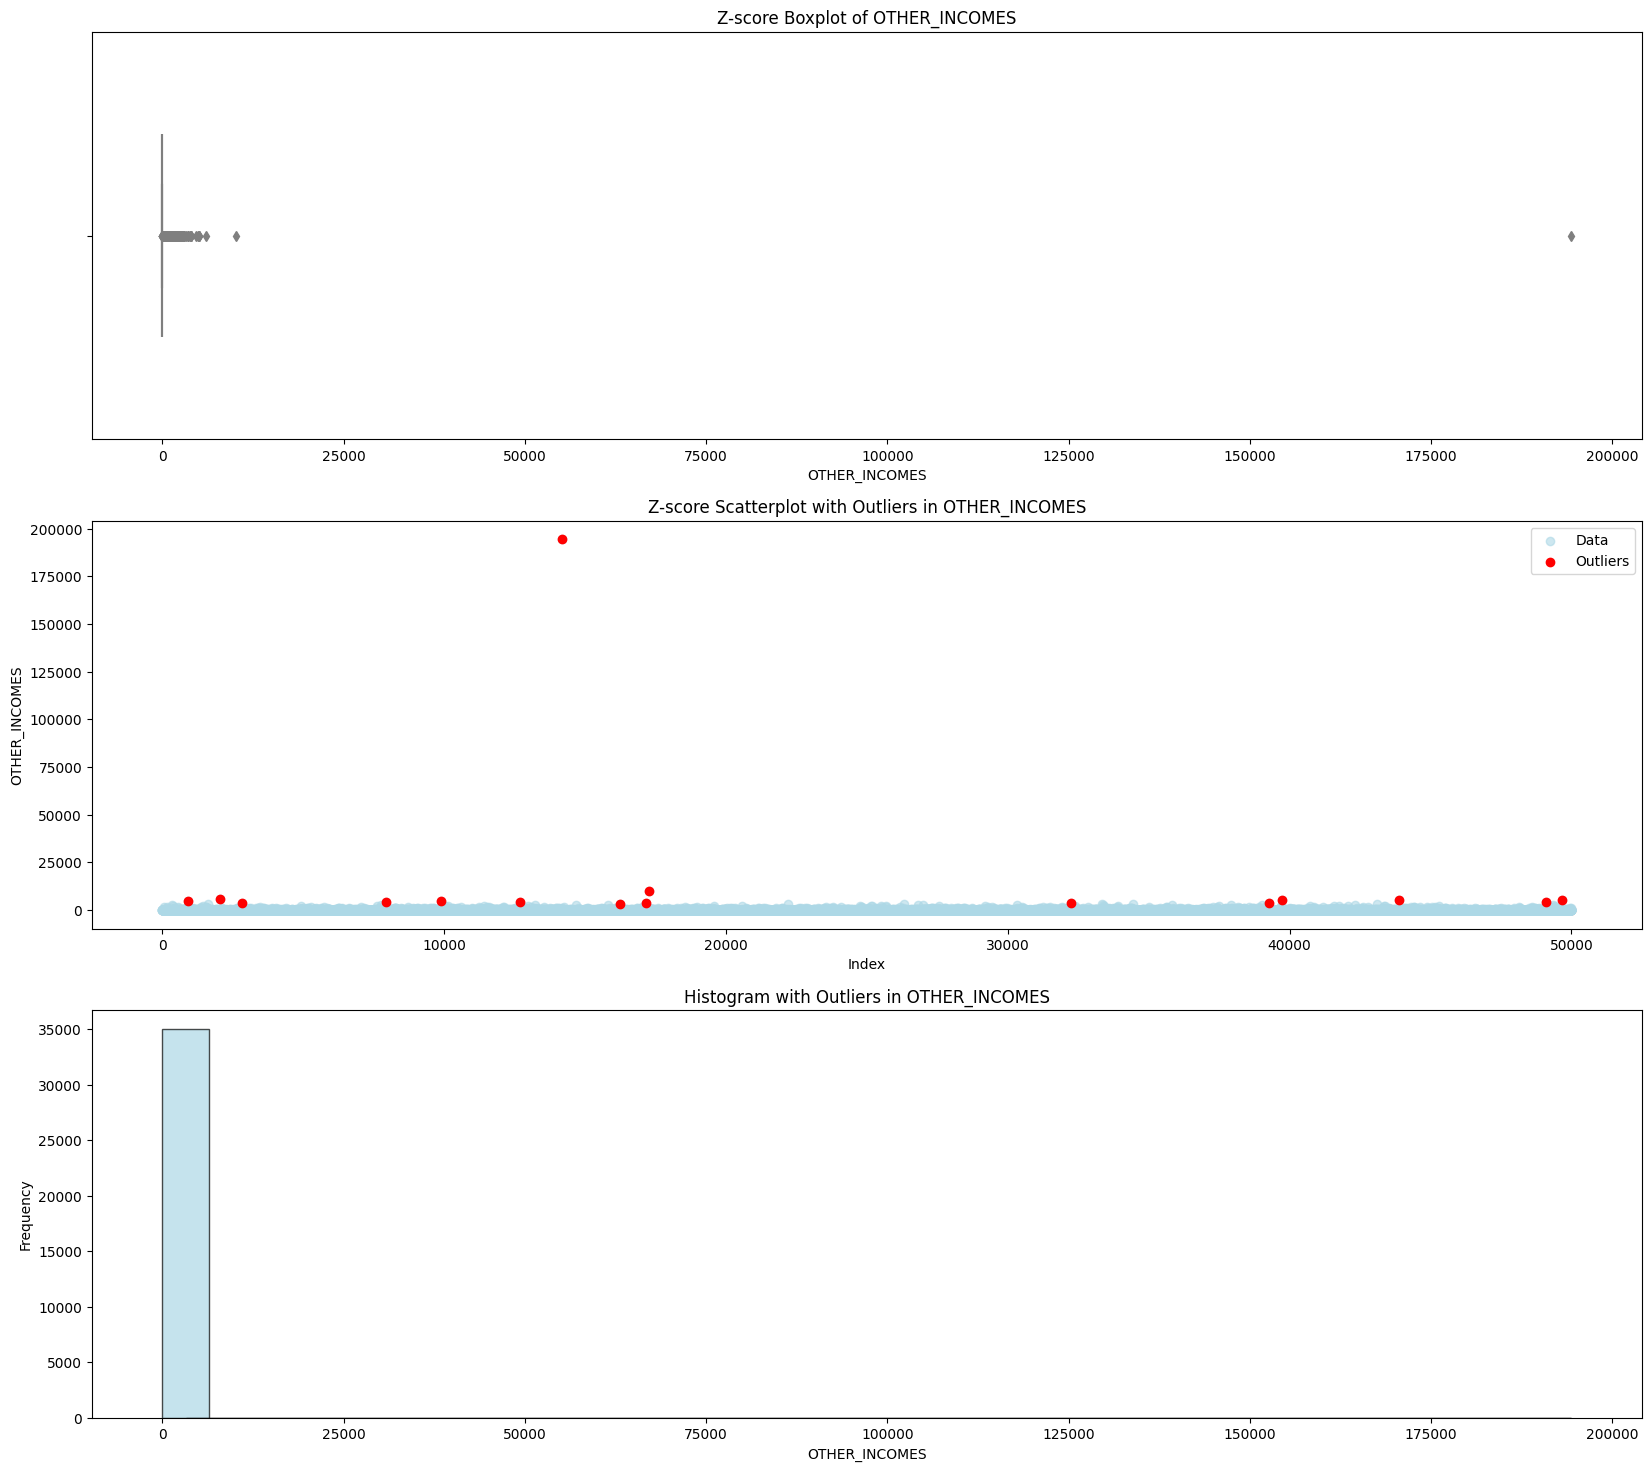

Outliers in OTHER_INCOMES Z-score:
OTHER_INCOMES
5000.00      3
4000.00      3
3500.00      2
3236.68      1
4660.00      1
6000.00      1
3850.00      1
194344.00    1
4881.70      1
3600.00      1
10200.00     1
Name: count, dtype: int64
Number of outliers in OTHER_INCOMES Z-score: 16



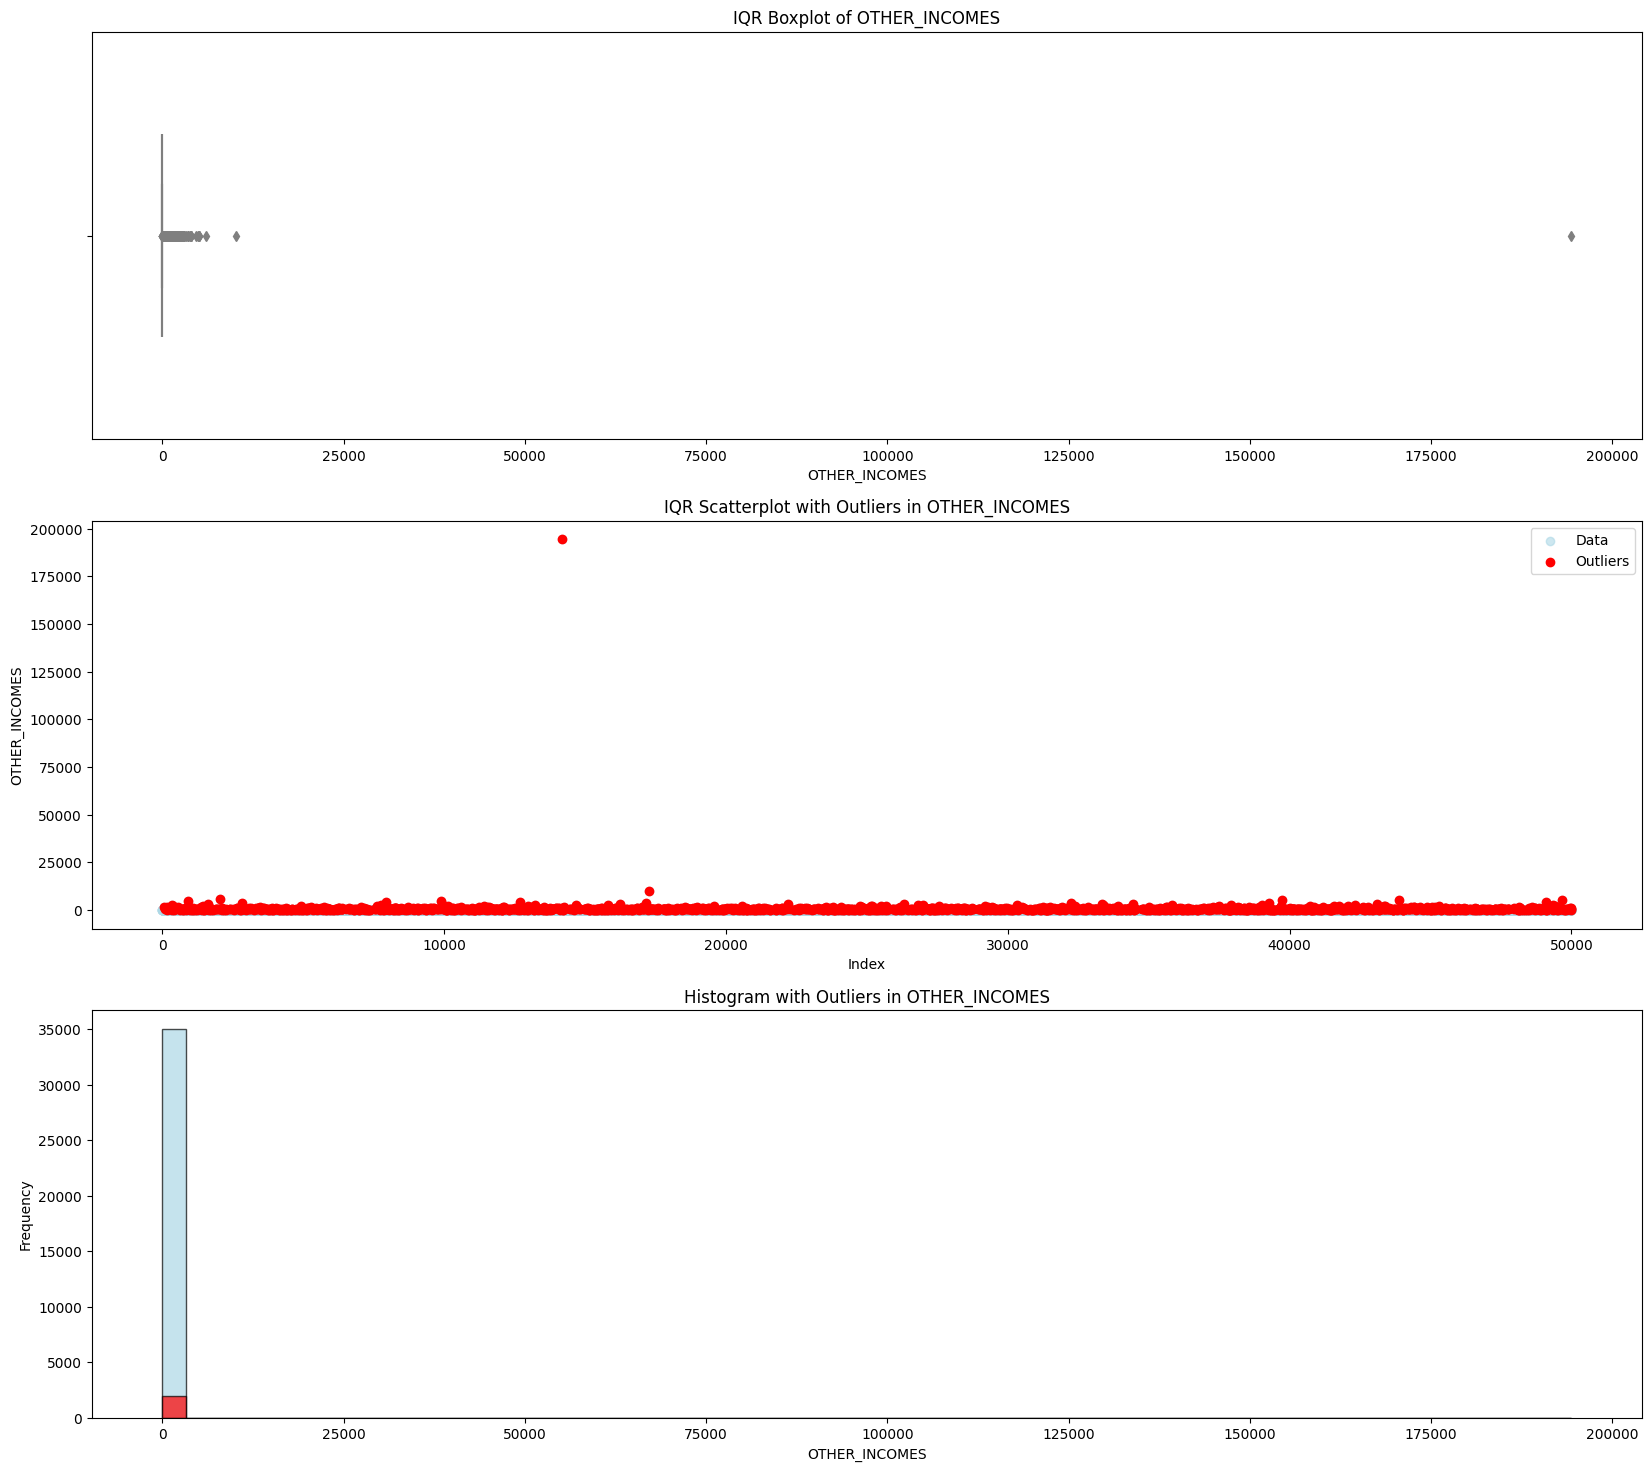

Outliers in OTHER_INCOMES IQR:
OTHER_INCOMES
350.00       253
200.00        97
300.00        94
400.00        93
500.00        93
600.00        87
250.00        60
150.00        48
380.00        45
1000.00       45
800.00        44
700.00        41
100.00        40
450.00        39
1200.00       27
900.00        25
95.00         25
80.00         20
650.00        16
120.00        15
2000.00       15
65.00         14
1500.00       13
320.00        13
50.00         12
360.00        11
220.00        10
550.00         9
750.00         8
420.00         8
1400.00        8
2500.00        7
480.00         7
850.00         7
270.00         6
1100.00        6
240.00         6
180.00         6
1700.00        5
1800.00        5
15.00          5
680.00         5
45.00          5
130.00         5
351.00         5
260.00         4
340.00         4
430.00         4
525.00         4
1300.00        4
230.00         4
460.00         4
1250.00        4
280.00         4
90.00          4
160.00         4
630

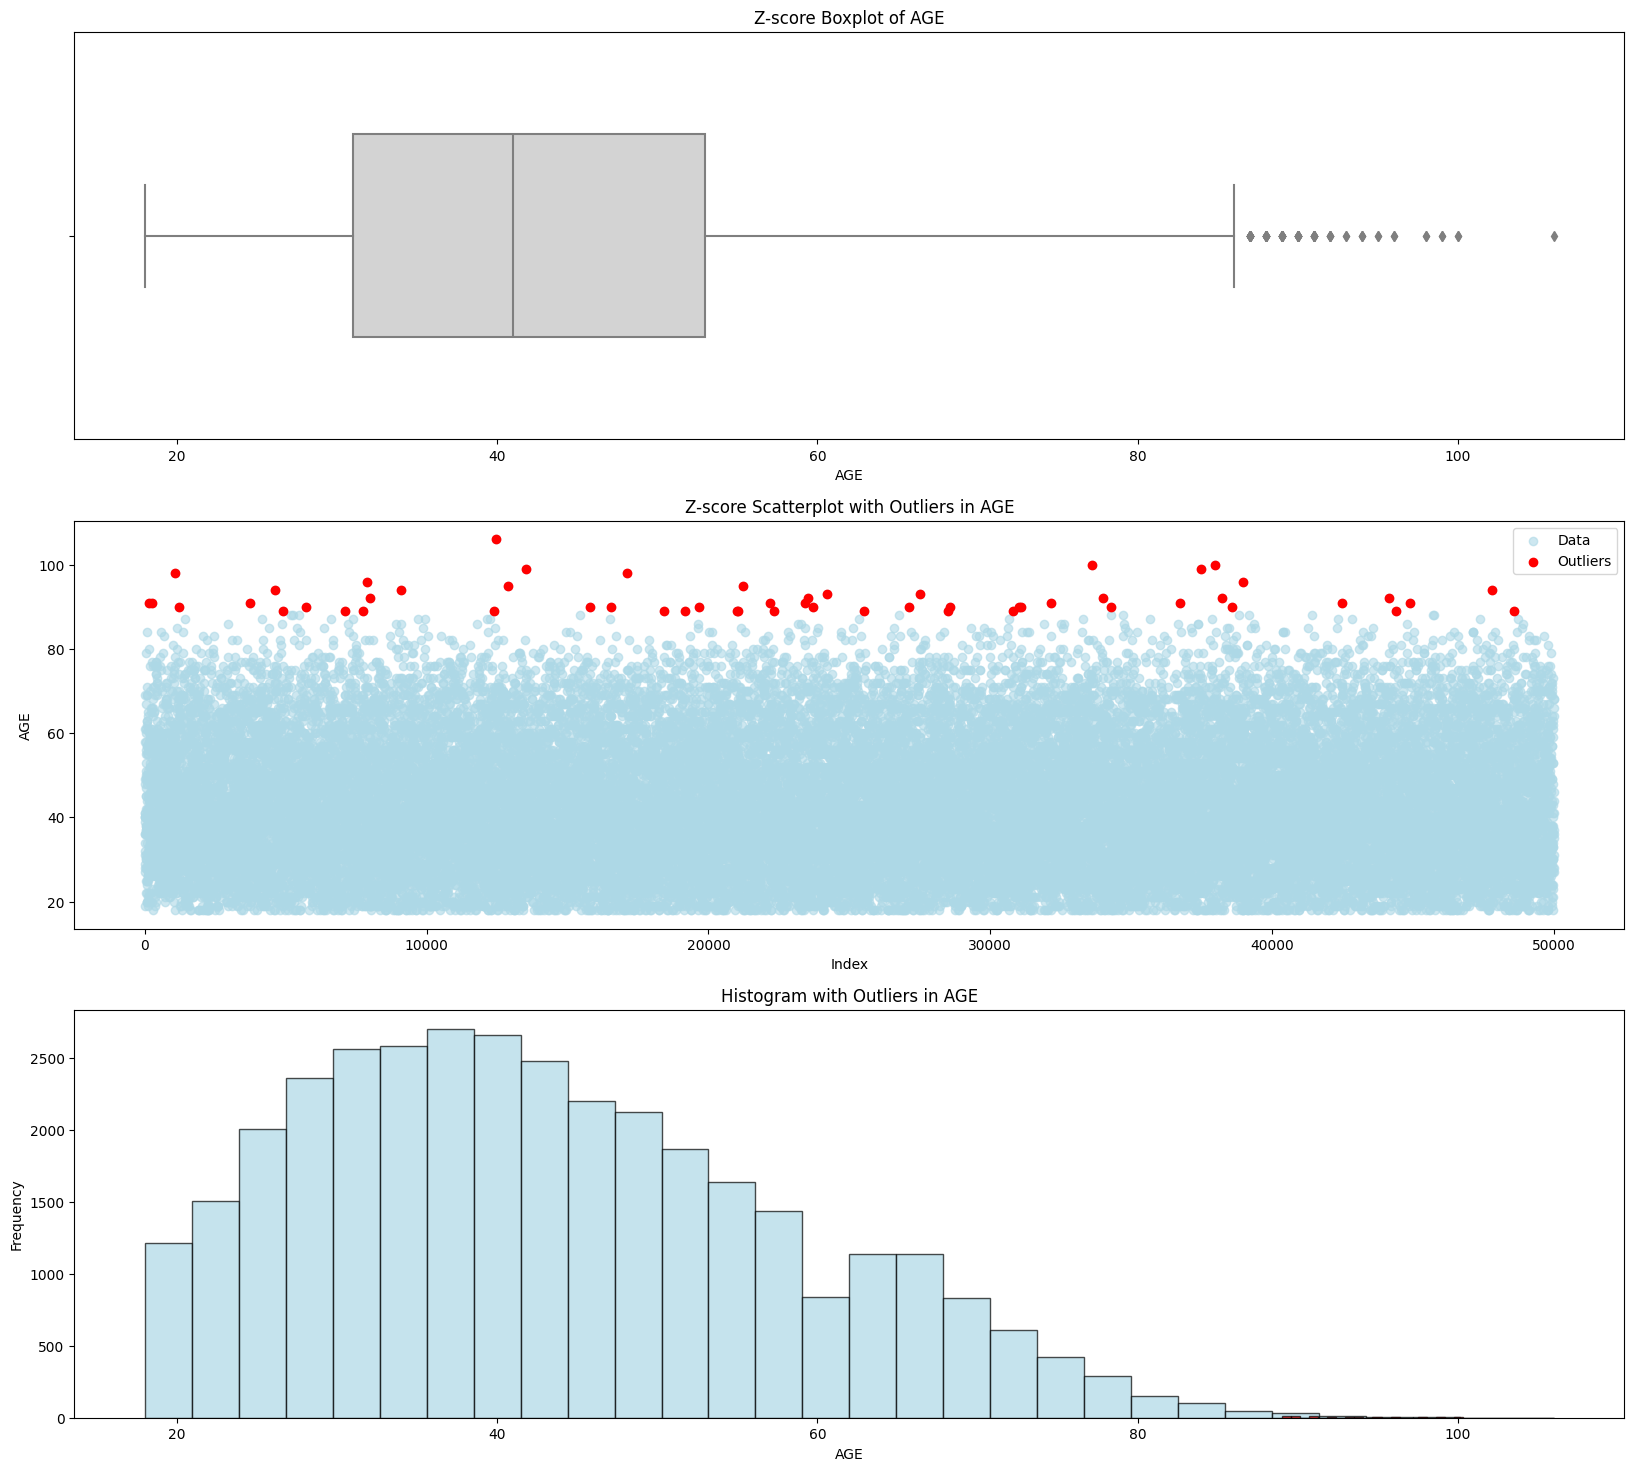

Outliers in AGE Z-score:
AGE
89     14
90     12
91      9
92      5
94      3
93      2
96      2
98      2
100     2
99      2
95      2
106     1
Name: count, dtype: int64
Number of outliers in AGE Z-score: 56



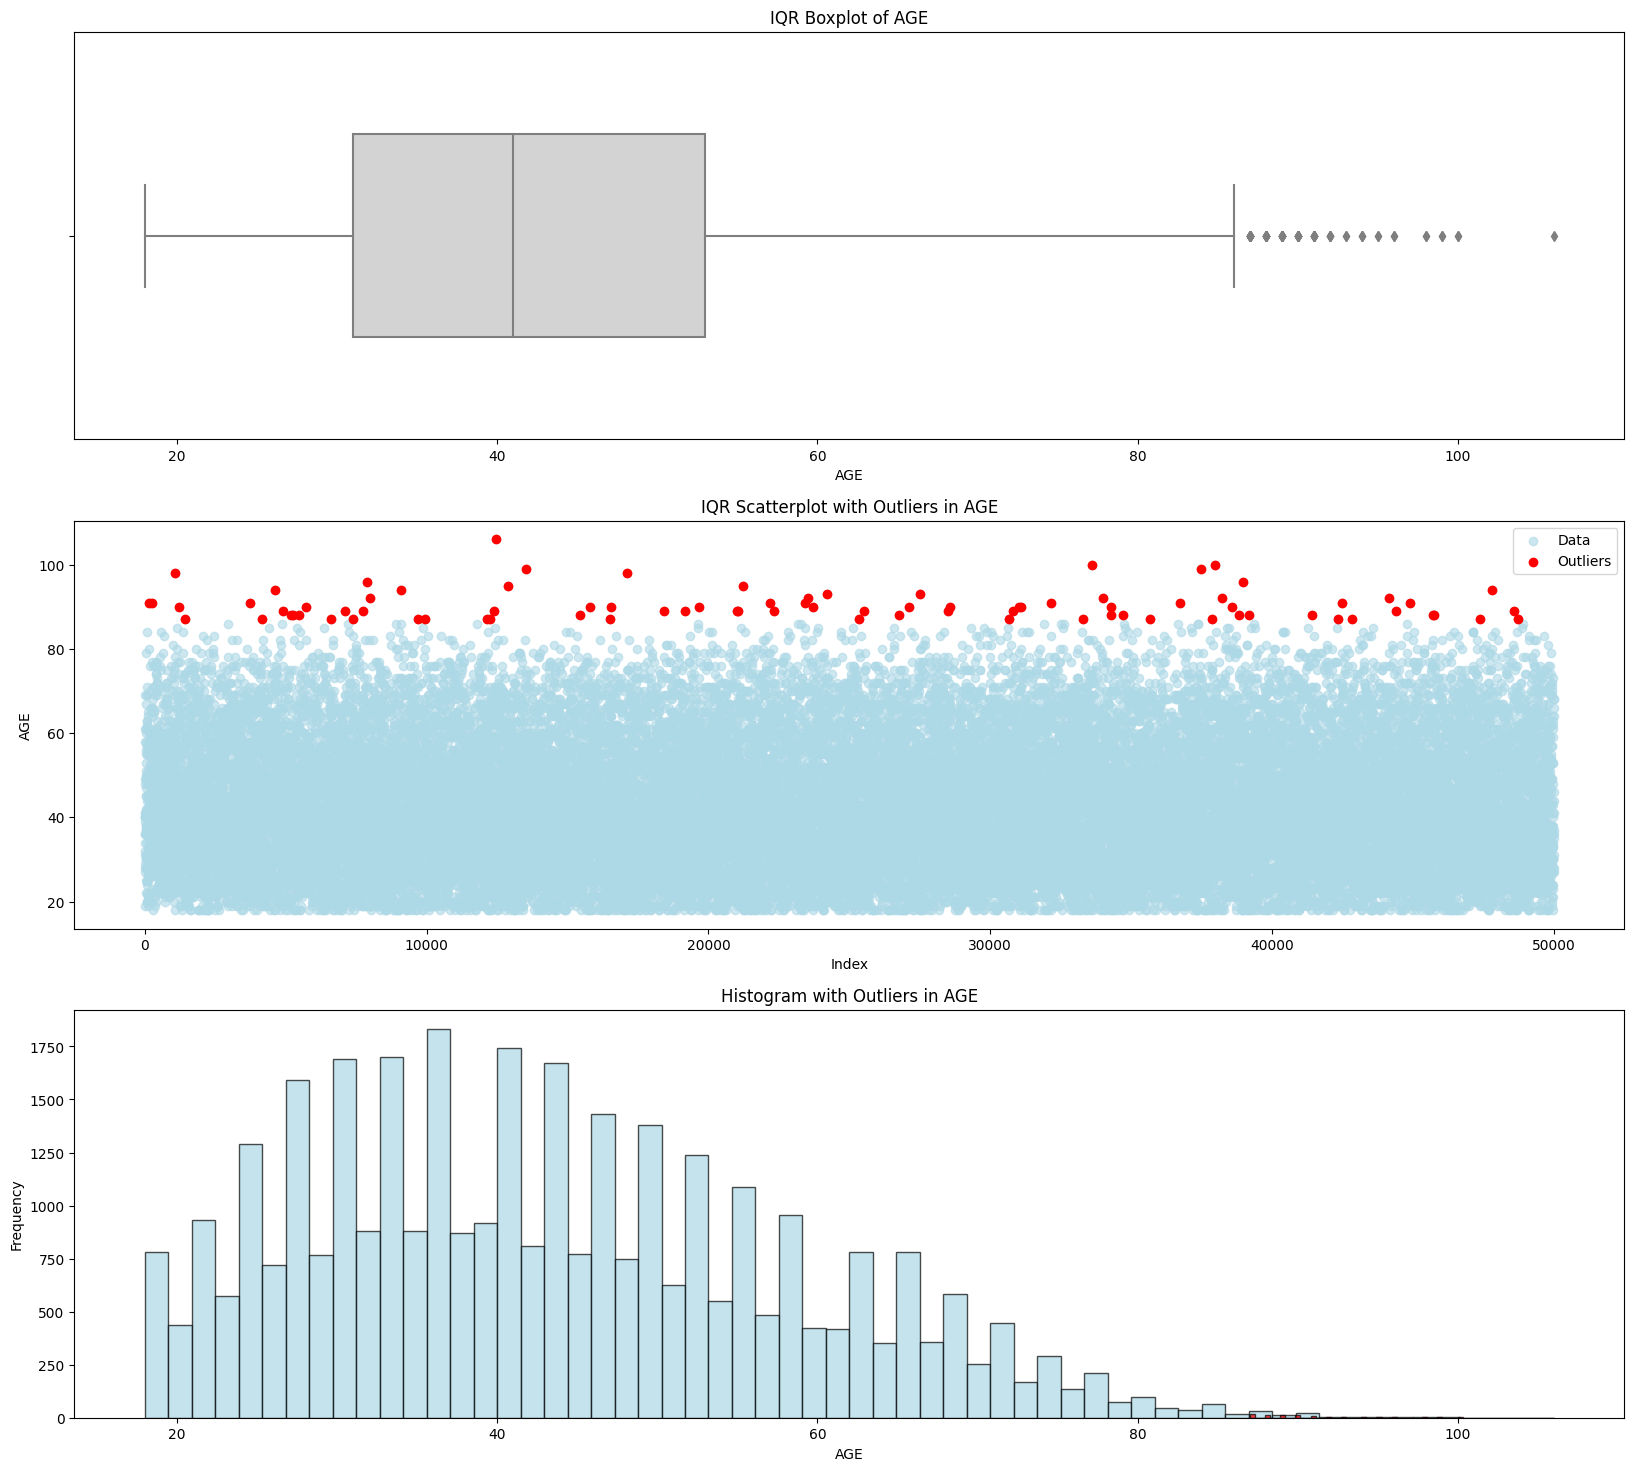

Outliers in AGE IQR:
AGE
87     18
89     14
88     12
90     12
91      9
92      5
94      3
93      2
95      2
96      2
98      2
99      2
100     2
106     1
Name: count, dtype: int64
Number of outliers in AGE IQR: 86



In [91]:
for var in numerical_predictor_columns:
    visualize_outliers_handling_Zscore(data_train, var)
    visualize_outliers_handling_IQR(data_train, var)

    

# Based on the previous visualisation, we've come up with these outliers dealing methods accordingly. 
1. QUANT_DENPENDENT 
   
            Mannually remove values greater than 50, because it's unlikely to take care of 50 people for one person. 
2. AGE
    
            Use z-SCORE to remove outliers
3. MONTHS_IN_RESIDENCE  
   
            do nothing (reasonable to have extremely high values)
4. PERSONAL_MONTHLY_INCOME 
   
            do nothing(reasonable to have extremely high values) 
5. OTHER_INCOME 
    
            do nothing(reasonable to have extremely high values)

In [100]:
def handle_outliers(datasets, columns):
    handled_datasets = []
    for data in datasets:
        handled_data = data.copy()
        for col in columns:
            if col in handled_data.columns:
                if col == "QUANT_DEPENDENT":
                    # remove values greater than 50
                    handled_data = handled_data[handled_data[col] <= 50]
                elif col == "AGE":
                    # Use z-score to remove outliers
                    z_scores = zscore(handled_data[col])
                    handled_data = handled_data[np.abs(z_scores) < 3]
        handled_datasets.append(handled_data)
    return handled_datasets

In [101]:
(
    Outliers_Handled_data_train_logit,
    Outliers_Handled_data_train,
    Outliers_Handled_data_test_logit,
    Outliers_Handled_data_test,
) = handle_outliers(
    datasets=[data_train_logit, data_train, data_test_logit, data_test],
    columns=numerical_predictor_columns,
)

## Let's check if we successfully removed the outliers

In [106]:
print(
    data_train.shape,
    Outliers_Handled_data_train.shape,
    "\n",
    data_test.shape,
    Outliers_Handled_data_test.shape,
    "\n",
    data_train_logit.shape,
    Outliers_Handled_data_train_logit.shape,
    "\n",
    data_test_logit.shape,
    Outliers_Handled_data_test_logit.shape,
)

(34988, 21) (34932, 21) 
 (14991, 21) (14965, 21) 
 (34988, 19) (34932, 19) 
 (14991, 19) (14965, 19)


# SCALLING

In [ ]:
# Extract the numerical predictor columns (replace with your column names)
numerical_predictor_columns = [
    "QUANT_DEPENDANTS",
    "MONTHS_IN_RESIDENCE",
    "PERSONAL_MONTHLY_INCOME",
    "OTHER_INCOMES",
    "AGE",
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical predictors
# data_train[numerical_predictor_columns] = scaler.fit_transform(data_train[numerical_predictor_columns])
# data_test[numerical_predictor_columns] = scaler.fit_transform(data_test[numerical_predictor_columns])

data_train_logit[numerical_predictor_columns] = scaler.fit_transform(
    data_train_logit[numerical_predictor_columns]
)
data_test_logit[numerical_predictor_columns] = scaler.fit_transform(
    data_test_logit[numerical_predictor_columns]
)

# GET DUMMIES

In [ ]:
data_train.head()

,PAYMENT_DAY,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_CARS,COMPANY,FLAG_PROFESSIONAL_PHONE,AGE,APPLICATION_SUBMISSION_TYPE,POSTAL_ADDRESS_TYPE,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,TARGET_LABEL_BAD.1,RESIDENCIAL_REGION
35652,5,0,N,6.0,735.0,0.0,1,0,N,N,68,Unknown,1,1,0,0,0,0,3,0,South
10443,5,0,Y,22.0,972.0,0.0,0,0,N,N,61,Web,1,1,0,1,0,0,2,0,Northeast
39543,15,0,Y,0.0,482.0,0.0,1,1,N,N,64,Unknown,1,1,0,0,0,0,4,1,Northeast
17395,10,0,Y,31.0,912.0,0.0,0,0,N,N,68,Carga,1,1,0,0,0,0,2,0,South
7491,5,0,Y,30.0,454.0,0.0,0,0,N,N,39,Unknown,1,1,0,0,0,0,1,0,Southeast


## One-hot Encoding

In [ ]:
categorical_columns = [
    "FLAG_RESIDENCIAL_PHONE",
    "COMPANY",
    "FLAG_PROFESSIONAL_PHONE",
    "APPLICATION_SUBMISSION_TYPE",
    "RESIDENCIAL_REGION",
]

data_train = pd.get_dummies(data_train, columns=categorical_columns)

data_test = pd.get_dummies(data_test, columns=categorical_columns)


data_train_logit = pd.get_dummies(data_train_logit, columns=categorical_columns)

data_test_logit = pd.get_dummies(data_test_logit, columns=categorical_columns)

## LABEL ENCODING 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'PAYMENT_DAY' is the column you want to label encode
label_encoder = LabelEncoder()

# Fit the label encoder on your 'PAYMENT_DAY' column and transform it
data_train_logit['PAYMENT_DAY'] = label_encoder.fit_transform(data_train_logit['PAYMENT_DAY'])
data_test_logit['PAYMENT_DAY'] = label_encoder.fit_transform(data_test_logit['PAYMENT_DAY'])

# TRAIN TEST SPLIT

In [ ]:
y_train = data_train['TARGET_LABEL_BAD.1']
x_train = data_train.drop(columns = ['TARGET_LABEL_BAD.1'])
y_test = data_test['TARGET_LABEL_BAD.1']
x_test = data_test.drop(columns = ['TARGET_LABEL_BAD.1'])

y_train_logit = data_train_logit['TARGET_LABEL_BAD.1']
x_train_logit = data_train_logit.drop(columns = ['TARGET_LABEL_BAD.1'])
y_test_logit = data_test_logit['TARGET_LABEL_BAD.1']
x_test_logit = data_test_logit.drop(columns = ['TARGET_LABEL_BAD.1'])

In [ ]:
x_train.shape

(34988, 29)

In [ ]:
x_train.head()

,PAYMENT_DAY,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,QUANT_BANKING_ACCOUNTS,QUANT_CARS,AGE,POSTAL_ADDRESS_TYPE,FLAG_EMAIL,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,MARITAL_STATUS,FLAG_RESIDENCIAL_PHONE_N,FLAG_RESIDENCIAL_PHONE_Y,COMPANY_N,COMPANY_Y,FLAG_PROFESSIONAL_PHONE_N,FLAG_PROFESSIONAL_PHONE_Y,APPLICATION_SUBMISSION_TYPE_Carga,APPLICATION_SUBMISSION_TYPE_Unknown,APPLICATION_SUBMISSION_TYPE_Web,RESIDENCIAL_REGION_Central-West,RESIDENCIAL_REGION_North,RESIDENCIAL_REGION_Northeast,RESIDENCIAL_REGION_South,RESIDENCIAL_REGION_Southeast
35652,5,0,6.0,735.0,0.0,1,0,68,1,1,0,0,0,0,3,True,False,True,False,True,False,False,True,False,False,False,False,True,False
10443,5,0,22.0,972.0,0.0,0,0,61,1,1,0,1,0,0,2,False,True,True,False,True,False,False,False,True,False,False,True,False,False
39543,15,0,0.0,482.0,0.0,1,1,64,1,1,0,0,0,0,4,False,True,True,False,True,False,False,True,False,False,False,True,False,False
17395,10,0,31.0,912.0,0.0,0,0,68,1,1,0,0,0,0,2,False,True,True,False,True,False,True,False,False,False,False,False,True,False
7491,5,0,30.0,454.0,0.0,0,0,39,1,1,0,0,0,0,1,False,True,True,False,True,False,False,True,False,False,False,False,False,True


In [ ]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

In [ ]:
x_resampled_logit, y_resampled_logit = smote_enn.fit_resample(x_train_logit, y_train_logit)

In [ ]:
x_resampled.shape

(25624, 29)

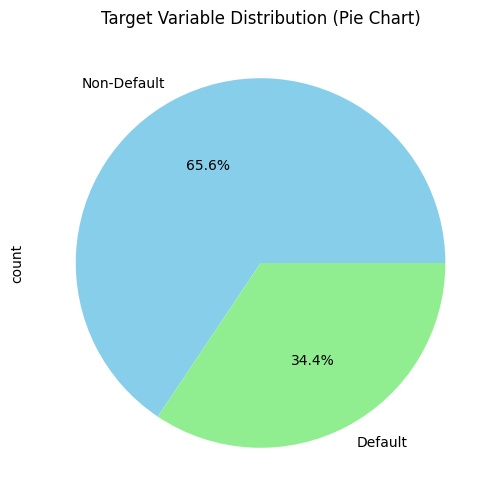

In [ ]:
# Plot pie chart for class distribution
plt.figure(figsize=(6, 6))
y_resampled.value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Default', 'Default'], colors=['skyblue', 'lightgreen'])
plt.title('Target Variable Distribution (Pie Chart)')
plt.show()

# LOGISTIC REGRESSION

In [ ]:
def calculate_accuracy(TP,FP,FN,TN):
    acc = 0    
    acc = (TP+TN)/(TP+FP+FN+TN)
    return acc
    
def calculate_recall(TP,FP,FN,TN):
    recall = 0    
    recall = (TP)/(TP+FN)      
    return recall
    
def calculate_specificity(TP,FP,FN,TN):   
    spec = 0
    spec = (TN)/(TN+FP)     
    return spec 

def calculate_precision(TP,FP,FN,TN):
    prec = 0    
    prec = (TP)/(TP+FP)     
    return prec 

#### Potential Predictor

In [ ]:
# Get the column names
column_names_logit = x_train_logit.columns.tolist()

# Print or use the column names as needed
print(column_names_logit)

['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_N', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_N', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_N', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Carga', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_Central-West', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']


## Original DATA

### RANDOM SEARCH

- C, default=1.0 - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

- penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, L1 penalty refers to Lasso regression (L2 would be ridge regression and 'elasticnet' elastic net)

- solver - ‘sag’ and ‘saga’ are faster for large ones;‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

### Tuning and fitting Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
parameters_logit={'C': np.logspace(0, 4, 50),
                  'penalty':['l1','l2','elasticnet','None'],
                  'solver':['newton-cholesky','saga'],
                 'class_weight':['balanced','None']}

Logitmodel=LogisticRegression()
logit_cv_obj = RandomizedSearchCV(Logitmodel,parameters_logit,scoring='accuracy',cv=5,random_state=0,n_iter=20)

logit_cv_obj.fit(x_train_logit,y_train_logit)
best_model_logit=logit_cv_obj.best_params_
print(best_model_logit)

{'solver': 'newton-cholesky', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 6.551285568595508}


c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
95 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 637, in _va

### Evaluation

### TRAIN SET

#### Running Time

In [ ]:
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
logit = LogisticRegression (random_state=0,**best_model_logit)
import time
start_time_logit = time.time()
logit.fit(x_train_logit,y_train_logit)
end_time_logit = time.time()
running_time = end_time_logit - start_time_logit

print(f"Running time: {running_time:.2f} seconds")

Running time: 0.06 seconds


#### Cassifcation Table

In [ ]:
y_pred_train_logit = logit.predict(x_train_logit)
print(classification_report(y_pred_train_logit, y_train_logit,digits = 4))

              precision    recall  f1-score   support

           0     0.5540    0.7972    0.6537     17972
           1     0.6006    0.3220    0.4192     17016

    accuracy                         0.5661     34988
   macro avg     0.5773    0.5596    0.5365     34988
weighted avg     0.5766    0.5661    0.5397     34988



### TEST SET

#### Classification Table

In [ ]:
y_pred_test_logit = logit.predict(x_test_logit)
print(classification_report(y_pred_test_logit, y_test_logit, digits = 4))

              precision    recall  f1-score   support

           0     0.5485    0.7951    0.6492      7646
           1     0.5990    0.3187    0.4161      7345

    accuracy                         0.5617     14991
   macro avg     0.5738    0.5569    0.5326     14991
weighted avg     0.5733    0.5617    0.5350     14991



#### Confusion Metrix

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
print(confusion_matrix(y_pred_test_logit, y_test_logit))

[[6079 1567]
 [5004 2341]]


In [ ]:
TP,FP,FN,TN = confusion_matrix(y_pred_test_logit, y_test_logit).ravel()
print('Accuracy '+str(calculate_accuracy(TP,FP,FN,TN)))
print('Recall '+str(calculate_recall(TP,FP,FN,TN)))
print('Precision '+str(calculate_precision(TP,FP,FN,TN)))
print('Specificity '+str(calculate_specificity(TP,FP,FN,TN)))

Accuracy 0.5616703355346542
Recall 0.5484976991789227
Precision 0.7950562385561077
Specificity 0.5990276356192425


#### ROC Curve

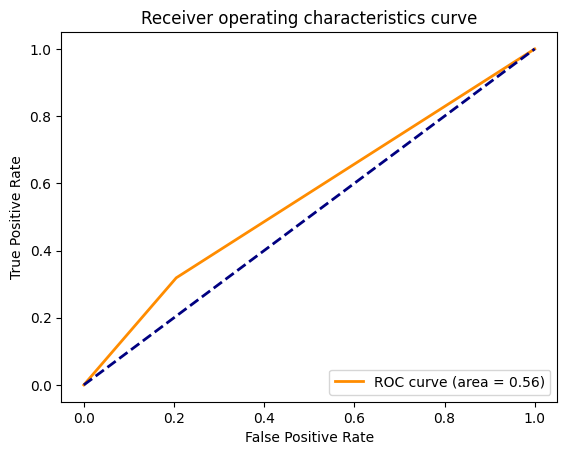

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

# SOLUTION

# Compute Receiver operating characteristic (ROC)
fpr, tpr, thresholds = roc(y_pred_test_logit, y_test_logit)




# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc = auc(fpr,tpr)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

## Resampled Data

### Tuning and Fitting Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters_logit={'C': np.logspace(0, 4, 50),
                  'penalty':['l1','l2','elasticnet','None'],
                  'solver':['newton-cholesky','saga'],
                 'class_weight':['balanced','None']}

Logitmodel_resampled=LogisticRegression()
logit_cv_obj_resampled = RandomizedSearchCV(Logitmodel_resampled,parameters_logit,scoring='accuracy',cv=5,random_state=0,n_iter=20)

logit_cv_obj_resampled.fit(x_resampled_logit,y_resampled_logit)
best_model_logit_resampled=logit_cv_obj_resampled.best_params_
print(best_model_logit_resampled)

{'solver': 'newton-cholesky', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 6.551285568595508}


c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
95 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 637, in _va

### Evaluation

### TRAIN SET

#### Running Time

In [ ]:
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
logit_resampled = LogisticRegression (random_state=0,**best_model_logit_resampled)
import time
start_time_logit_resampled = time.time()
logit_resampled.fit(x_resampled_logit,y_resampled_logit)
end_time_logit_resampled = time.time()
running_time_resampled = end_time_logit_resampled - start_time_logit_resampled

print(f"Running time: {running_time_resampled:.2f} seconds")

Running time: 0.07 seconds


#### Classification Table

In [ ]:
y_pred_train_logit_resampled = logit_resampled.predict(x_resampled_logit)
print(classification_report(y_pred_train_logit_resampled, y_resampled_logit, digits = 4))

              precision    recall  f1-score   support

           0     0.7066    0.5907    0.6435     11911
           1     0.6657    0.7686    0.7134     12628

    accuracy                         0.6823     24539
   macro avg     0.6861    0.6797    0.6785     24539
weighted avg     0.6855    0.6823    0.6795     24539



### TEST SET

#### Classification Table

In [ ]:
y_pred_test_logit_resampled = logit_resampled.predict(x_test_logit)
print(classification_report(y_pred_test_logit_resampled, y_test_logit, digits = 4))

              precision    recall  f1-score   support

           0     0.5902    0.7773    0.6709      8415
           1     0.5205    0.3093    0.3880      6576

    accuracy                         0.5720     14991
   macro avg     0.5553    0.5433    0.5295     14991
weighted avg     0.5596    0.5720    0.5468     14991



#### Confusion Metrix

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
print(confusion_matrix(y_pred_test_logit_resampled, y_test_logit))

[[6541 1874]
 [4542 2034]]


In [ ]:
TP_resampled,FP_resampled,FN_resampled,TN_resampled = confusion_matrix(y_pred_test_logit_resampled, y_test_logit.values).ravel()
print('Accuracy '+str(calculate_accuracy(TP_resampled,FP_resampled,FN_resampled,TN_resampled)))
print('Recall '+str(calculate_recall(TP_resampled,FP_resampled,FN_resampled,TN_resampled)))
print('Precision '+str(calculate_precision(TP_resampled,FP_resampled,FN_resampled,TN_resampled)))
print('Specificity '+str(calculate_specificity(TP_resampled,FP_resampled,FN_resampled,TN_resampled)))

Accuracy 0.5720098725902208
Recall 0.5901831634034106
Precision 0.7773024361259655
Specificity 0.5204708290685772


#### ROC Curve

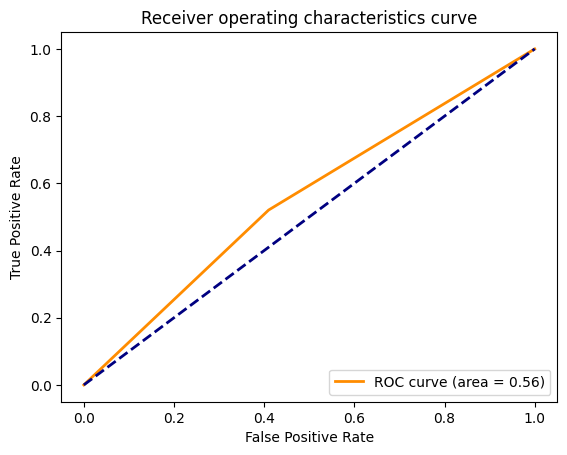

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

# SOLUTION

# Compute Receiver operating characteristic (ROC)
fpr_resampled, tpr_resampled, thresholds_resampled = roc(y_test_logit.values,y_pred_test_logit_resampled)




# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc_resampled = auc(fpr_resampled,tpr_resampled)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

#### Potential Predictors

In [ ]:
# Get the column names
column_names = x_train.columns.tolist()

# Print or use the column names as needed
print(column_names)

['PAYMENT_DAY', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES', 'QUANT_BANKING_ACCOUNTS', 'QUANT_CARS', 'AGE', 'POSTAL_ADDRESS_TYPE', 'FLAG_EMAIL', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'MARITAL_STATUS', 'FLAG_RESIDENCIAL_PHONE_N', 'FLAG_RESIDENCIAL_PHONE_Y', 'COMPANY_N', 'COMPANY_Y', 'FLAG_PROFESSIONAL_PHONE_N', 'FLAG_PROFESSIONAL_PHONE_Y', 'APPLICATION_SUBMISSION_TYPE_Carga', 'APPLICATION_SUBMISSION_TYPE_Unknown', 'APPLICATION_SUBMISSION_TYPE_Web', 'RESIDENCIAL_REGION_Central-West', 'RESIDENCIAL_REGION_North', 'RESIDENCIAL_REGION_Northeast', 'RESIDENCIAL_REGION_South', 'RESIDENCIAL_REGION_Southeast']


## Original Data

### Random Search

- n_estimators - It defines the number of decision trees to be created in a random forest.- Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.
- min_samples_leaf - The minimum number of samples required to be at a leaf node.
- max_features - The number of features to consider when looking for the best split:
- max_depth - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- class_weight - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)) / The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

### Tuning and fitting Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters_ramdonforest={'n_estimators': np.arange(20,100),
                         'min_samples_leaf': [10,50,100],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'max_depth': [None, 10, 20],
                         'class_weight': ['balanced_subsample','balanced']}

RandomForestmodel=RandomForestClassifier(criterion='gini',random_state=0)
ram_forest_cv_obj = RandomizedSearchCV(RandomForestmodel,parameters_ramdonforest,scoring='accuracy',cv=5,random_state=0,n_iter=50)

ram_forest_cv_obj.fit(x_train,y_train)
best_model_forest=ram_forest_cv_obj.best_params_
print(best_model_forest)

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 637, in _va

{'n_estimators': 90, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}


### Evaluation

### TRAIN SET

#### Running Time

In [ ]:
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
rand_forest = RandomForestClassifier(criterion='gini',random_state=0,**best_model_forest)
import time
start_time_forest = time.time()
rand_forest.fit(x_train,y_train)
end_time_forest = time.time()
running_time_forest = end_time_forest - start_time_forest

print(f"Running time: {running_time_forest:.2f} seconds")

Running time: 2.89 seconds


#### Classification Report

In [ ]:
y_pred_train_forest = rand_forest.predict(x_train)
print(classification_report(y_pred_train_forest, y_train,digits=4))

              precision    recall  f1-score   support

           0     0.7841    0.8980    0.8372     22584
           1     0.7475    0.5497    0.6335     12404

    accuracy                         0.7745     34988
   macro avg     0.7658    0.7239    0.7353     34988
weighted avg     0.7711    0.7745    0.7650     34988



### TEST SET

#### Classification Report

In [ ]:
y_pred_test_forest = rand_forest.predict(x_test)
print(classification_report(y_pred_test_forest, y_test,digits=4))

              precision    recall  f1-score   support

           0     0.6940    0.7835    0.7360      9818
           1     0.4560    0.3445    0.3925      5173

    accuracy                         0.6320     14991
   macro avg     0.5750    0.5640    0.5643     14991
weighted avg     0.6119    0.6320    0.6175     14991



#### Confusion Metrix

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
print(confusion_matrix(y_pred_test_forest, y_test))

[[7692 2126]
 [3391 1782]]


In [ ]:
TP_forest,FP_forest,FN_forest,TN_forest = confusion_matrix(y_pred_test_forest, y_test).ravel()
print('Accuracy '+str(calculate_accuracy(TP_forest,FP_forest,FN_forest,TN_forest)))
print('Recall '+str(calculate_recall(TP_forest,FP_forest,FN_forest,TN_forest)))
print('Precision '+str(calculate_precision(TP_forest,FP_forest,FN_forest,TN_forest)))
print('Specificity '+str(calculate_specificity(TP_forest,FP_forest,FN_forest,TN_forest)))

Accuracy 0.6319791875125075
Recall 0.6940359108544618
Precision 0.783458952943573
Specificity 0.45598771750255884


#### ROC Curve

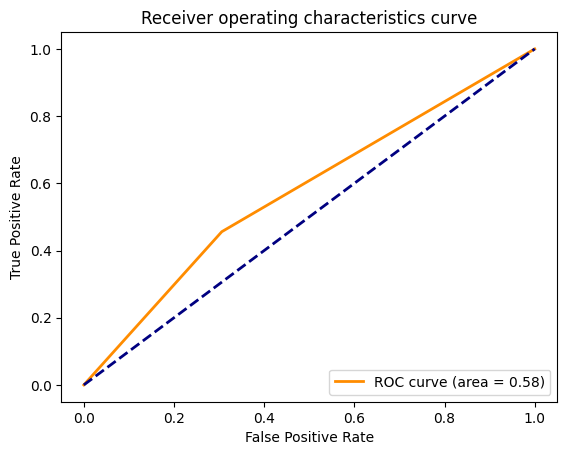

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

# SOLUTION

# Compute Receiver operating characteristic (ROC)
fpr_forest, tpr_forest, thresholds_forest = roc(y_test.values,y_pred_test_forest)




# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc_forest = auc(fpr_forest, tpr_forest)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_forest, tpr_forest, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

## Resampled Data

### Tuning and fitting Model

In [ ]:
ram_forest_cv_obj.fit(x_resampled,y_resampled)
best_model_forest_resampled=ram_forest_cv_obj.best_params_
print(best_model_forest_resampled)

c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\redhawc\.pyenv\pyenv-win\versions\3.11.2\Lib\site-packages\sklearn\base.py", line 637, in _va

{'n_estimators': 90, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}


### Evaluation

#### Running Time

In [ ]:
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
rand_forest_resampled = RandomForestClassifier(criterion='gini',random_state=0,**best_model_forest_resampled)
import time
start_time_forest_resampled = time.time()
rand_forest_resampled.fit(x_resampled,y_resampled)
end_time_forest_resampled = time.time()
running_time_forest_resampled = end_time_forest_resampled - start_time_forest_resampled

print(f"Running time: {running_time_forest_resampled:.2f} seconds")

Running time: 2.06 seconds


#### Classification Report

In [ ]:
y_pred_train_forest_resampled = rand_forest_resampled.predict(x_resampled)
print(classification_report(y_pred_train_forest_resampled, y_resampled,digits=4))

              precision    recall  f1-score   support

           0     0.9644    0.7122    0.8193     11931
           1     0.7958    0.9771    0.8771     13693

    accuracy                         0.8537     25624
   macro avg     0.8801    0.8446    0.8482     25624
weighted avg     0.8743    0.8537    0.8502     25624



### TEST SET

#### Classification Report

In [ ]:
y_pred_test_forest_resampled = rand_forest_resampled.predict(x_test)
print(classification_report(y_pred_test_forest_resampled, y_test,digits=4))

              precision    recall  f1-score   support

           0     0.8823    0.7545    0.8134     12959
           1     0.1860    0.3578    0.2448      2032

    accuracy                         0.7008     14991
   macro avg     0.5341    0.5562    0.5291     14991
weighted avg     0.7879    0.7008    0.7363     14991



#### Confusion Metrix

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
print(confusion_matrix(y_pred_test_forest_resampled, y_test))

[[9778 3181]
 [1305  727]]


In [ ]:
TP_forest_resampled,FP_forest_resampled,FN_forest_resampled,TN_forest_resampled = confusion_matrix(y_pred_test_forest_resampled, y_test).ravel()
print('Accuracy '+str(calculate_accuracy(TP_forest_resampled,FP_forest_resampled,FN_forest_resampled,TN_forest_resampled)))
print('Recall '+str(calculate_recall(TP_forest_resampled,FP_forest_resampled,FN_forest_resampled,TN_forest_resampled)))
print('Precision '+str(calculate_precision(TP_forest_resampled,FP_forest_resampled,FN_forest_resampled,TN_forest_resampled)))
print('Specificity '+str(calculate_specificity(TP_forest_resampled,FP_forest_resampled,FN_forest_resampled,TN_forest_resampled)))

Accuracy 0.7007537856046961
Recall 0.8822520978074528
Precision 0.7545335288216684
Specificity 0.186028659160696


#### ROC Curve

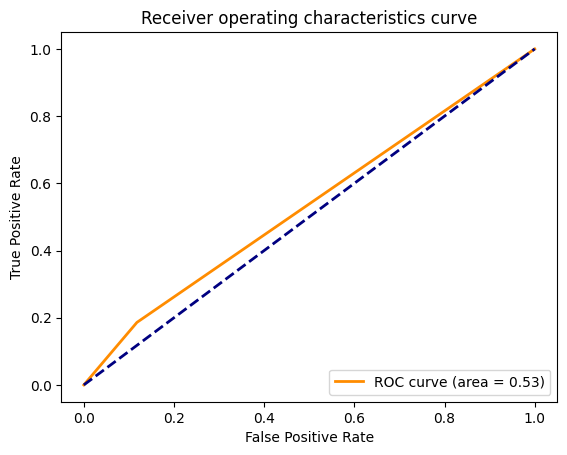

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc

# SOLUTION

# Compute Receiver operating characteristic (ROC)
fpr_forest_resampled, tpr_forest_resampled, thresholds_forest_resampled = roc(y_test.values,y_pred_test_forest_resampled)




# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
# For an alternative way to summarize a precision-recall curve, see average_precision_score.
roc_auc_forest_resampled = auc(fpr_forest_resampled, tpr_forest_resampled)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_forest_resampled, tpr_forest_resampled, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest_resampled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()